In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_pop = pd.read_csv("df_population.csv")
df_veg = pd.read_csv("df_vegetal.csv")
df_anim = pd.read_csv("nouveau_animaux.csv")

In [3]:
"""
1) Nettoyer les titres de colonnes :
Supprimer les espaces au début et à la fin des titres
Remplacer les espaces par des underscores (ceux se situant entre les mots)
Tout mettre en minuscule
"""
df_pop.columns = df_pop.columns.str.replace(' ', '_').str.lower()
df_anim.columns = df_anim.columns.str.replace(' ', '_').str.lower()
df_veg.columns = df_veg.columns.str.replace(' ', '_').str.lower()

### 2) Quelles sont les dimensions des jeux de données ?

In [4]:
print(f"Dimensions du df_pop : {df_pop.ndim}. Shape du df_pop : {df_pop.shape}")
print(f"Dimensions du df_anim : {df_anim.ndim}. Shape du df_anim : {df_anim.shape}")
print(f"Dimensions du df_veg : {df_veg.ndim}. Shape du df_veg : {df_veg.shape}")

Dimensions du df_pop : 2. Shape du df_pop : (364, 14)
Dimensions du df_anim : 2. Shape du df_anim : (27713, 14)
Dimensions du df_veg : 2. Shape du df_veg : (92233, 14)


### 3) A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [5]:
df_pop.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,36686.78,X,Figure from international organizations
1,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 No,37769.50,X,Figure from international organizations
2,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,2877.01,X,Figure from international organizations
3,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 No,2873.88,X,Figure from international organizations
4,FBS,Food Balances (2010-),12,Algeria,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,41927.01,X,Figure from international organizations


In [6]:
df_veg.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,162.62,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2019,2019,kg,160.40,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2018,2018,kcal/cap/d,1365.34,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2019,2019,kcal/cap/d,1346.93,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2511,Wheat and products,2018,2018,g/cap/d,41.23,E,Estimated value


In [7]:
df_anim.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.67,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2019,2019,kg,2.76,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2018,2018,kcal/cap/d,14.92,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2019,2019,kcal/cap/d,15.42,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2731,Bovine Meat,2018,2018,g/cap/d,1.12,E,Estimated value


### 4) Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal’ et ‘vegetal’. Une fois cette étape effectuée, regroupez les deux jeux de données en 1 et appelez ce DataFrame product. Attention à bien comprendre la structure des données pour utiliser la bonne méthode.

In [8]:
df_anim["type"] = "animal"
df_veg["type"] = "vegetal"

In [9]:
df_products = pd.merge(df_veg, df_anim, how = "outer")

### 5) Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population. Renommer la colonne ‘value’ en ‘pop_1000_hab’

In [10]:
df_pop.head(3)
df_pop = df_pop[["area_code_(m49)", "area", "year", "value"]]
df_pop = df_pop.rename(columns={"value" : "pop_1000_hab"})
df_pop

,area_code_(m49),area,year,pop_1000_hab
0,4,Afghanistan,2018,36686.78
1,4,Afghanistan,2019,37769.50
2,8,Albania,2018,2877.01
3,8,Albania,2019,2873.88
4,12,Algeria,2018,41927.01
...,...,...,...,...
359,887,Yemen,2019,31546.69
360,894,Zambia,2018,17835.89
361,894,Zambia,2019,18380.48
362,716,Zimbabwe,2018,15052.18


### 6) Transformez products afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit.

In [11]:
df_products = df_products[["area_code_(m49)", "area", "element", "item", "year", "type", "unit", "value"]]
df_products

,area_code_(m49),area,element,item,year,type,unit,value
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,162.62
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,160.40
2,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/cap/d,1365.34
3,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/cap/d,1346.93
4,4,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/cap/d,41.23
...,...,...,...,...,...,...,...,...
119941,716,Zimbabwe,Fat supply quantity (g/capita/day),"Molluscs, Other",2019,animal,g/cap/d,0.00
119942,716,Zimbabwe,Food supply quantity (kg/capita/yr),"Aquatic Animals, Others",2019,animal,kg,0.00
119943,716,Zimbabwe,Food supply (kcal/capita/day),"Aquatic Animals, Others",2019,animal,kcal/cap/d,0.00
119944,716,Zimbabwe,Protein supply quantity (g/capita/day),"Aquatic Animals, Others",2019,animal,g/cap/d,0.00


### 7) Fusionnez df_pop avec product et nommez ce DataFrame df. Afin de fusionner ces jeux de données vous devez identifier les clés primaires. Renommer les colonnes comme sur le capture d’écran ci-dessous.

In [12]:
df = pd.merge(df_products, df_pop, on=["area", "year", "area_code_(m49)"], how="left")
df

,area_code_(m49),area,element,item,year,type,unit,value,pop_1000_hab
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,162.62,36686.78
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,160.40,37769.50
2,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/cap/d,1365.34,36686.78
3,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/cap/d,1346.93,37769.50
4,4,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/cap/d,41.23,36686.78
...,...,...,...,...,...,...,...,...,...
119941,716,Zimbabwe,Fat supply quantity (g/capita/day),"Molluscs, Other",2019,animal,g/cap/d,0.00,15354.61
119942,716,Zimbabwe,Food supply quantity (kg/capita/yr),"Aquatic Animals, Others",2019,animal,kg,0.00,15354.61
119943,716,Zimbabwe,Food supply (kcal/capita/day),"Aquatic Animals, Others",2019,animal,kcal/cap/d,0.00,15354.61
119944,716,Zimbabwe,Protein supply quantity (g/capita/day),"Aquatic Animals, Others",2019,animal,g/cap/d,0.00,15354.61


### 8) Quelles sont les types de données de chaque colonne ?

In [13]:
df.dtypes

area_code_(m49)      int64
area                object
element             object
item                object
year                 int64
type                object
unit                object
value              float64
pop_1000_hab       float64
dtype: object

### 9) Combien y-a t’il de valeurs manquantes par variable ?

In [14]:
df.isna().sum()

area_code_(m49)    0
area               0
element            0
item               0
year               0
type               0
unit               0
value              0
pop_1000_hab       0
dtype: int64

### 10) Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.

In [15]:
df.describe()

,area_code_(m49),year,value,pop_1000_hab
count,119946.000000,119946.000000,119946.000000,1.199460e+05
mean,427.344122,2018.509062,11.643984,4.327827e+04
std,250.391442,0.499920,56.450984,1.534066e+05
min,4.000000,2018.000000,0.000000,1.213000e+01
25%,208.000000,2018.000000,0.010000,2.508880e+03
50%,422.000000,2019.000000,0.270000,9.958830e+03
75%,642.000000,2019.000000,3.330000,3.154669e+04
max,894.000000,2019.000000,1744.850000,1.421864e+06


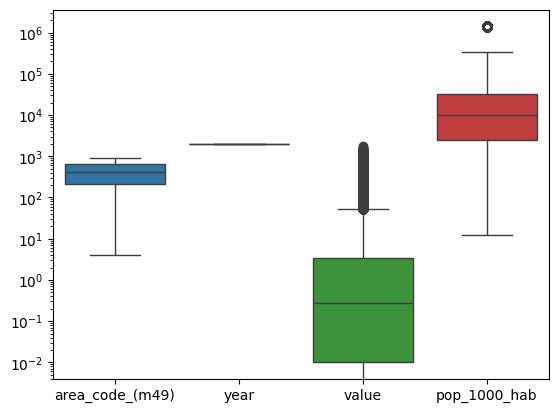

In [16]:
sns.boxplot(data=df, whis=15)
plt.yscale("log")
plt.show()

### 11) Affichez les valeurs uniques de la colonne country

In [17]:
df["area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polyn

### Gardez uniquement les informations relatives aux pays (supprimez les zones géographiques ou économiques) Note : en fonction de votre méthode d’importation de données cette étape est facultative.

In [18]:
# RAS 
df

,area_code_(m49),area,element,item,year,type,unit,value,pop_1000_hab
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,162.62,36686.78
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,160.40,37769.50
2,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/cap/d,1365.34,36686.78
3,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/cap/d,1346.93,37769.50
4,4,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/cap/d,41.23,36686.78
...,...,...,...,...,...,...,...,...,...
119941,716,Zimbabwe,Fat supply quantity (g/capita/day),"Molluscs, Other",2019,animal,g/cap/d,0.00,15354.61
119942,716,Zimbabwe,Food supply quantity (kg/capita/yr),"Aquatic Animals, Others",2019,animal,kg,0.00,15354.61
119943,716,Zimbabwe,Food supply (kcal/capita/day),"Aquatic Animals, Others",2019,animal,kcal/cap/d,0.00,15354.61
119944,716,Zimbabwe,Protein supply quantity (g/capita/day),"Aquatic Animals, Others",2019,animal,g/cap/d,0.00,15354.61


### 13) Modifiez votre jeu de données afin que les informations soient indexées par area_code, area, year, pop_1000_hab, type et item. Les valeurs de la colonne element doivent être séparées dans des colonnes différentes. Recherchez sur internet la différence entre les formats long et les formats wide. Pour réussir cette étape creuser la méthode pivot_table. Il est préférable d’appliquer la méthode reset_index() après avoir utilisé la méthode précédente.

In [19]:
# MODIFICATION DU NOM DE LA VARIABLE AREA_CODE
df = df.rename(columns={"area_code_(m49)" : "area_code"})
df = df.rename(columns={"element" : "index"})

In [20]:
df = df.pivot_table(index=["area_code", "area", "year", "pop_1000_hab", "type", "item"], columns="index", values="value")
# df_test.head(70)
# df_test.reset_index()

In [21]:
df = df.reset_index()
df

index,area_code,area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
30011,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
30012,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
30013,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
30014,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


### 14) Faire du nettoyage dans le nom des colonnes
Notez bien la dimension du jeu de données. Si tout s'est bien déroulé vous devez avoir le même resultat, sinon revoyez les étapes précédentes.

In [22]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.shape

(30016, 10)

In [23]:
df = df.rename(columns={"area":"country", "area_code" : "country_code"})
df 

index,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
30011,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
30012,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
30013,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
30014,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


### 15) Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018

In [24]:
filtre_2018 = df["year"] == 2018
df[filtre_2018]

index,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
29926,894,Zambia,2018,17835.89,vegetal,Tea (including mate),0.00,0.04,0.11,0.00
29927,894,Zambia,2018,17835.89,vegetal,Tomatoes and products,0.01,0.77,1.38,0.03
29928,894,Zambia,2018,17835.89,vegetal,"Vegetables, other",0.18,15.27,20.14,1.28
29929,894,Zambia,2018,17835.89,vegetal,Wheat and products,0.29,60.49,7.99,1.91


### 16) Nous allons ajouter une nouvelle colonne à notre jeu de données : la zone géographique. J’ai récupéré ces informations pour vous sur le site de la FAO. Effectuer un merge entre ce jeu de données et le vôtre.
BONUS Créer ce jeu de données par vous même sur le site de la FAO.

In [25]:
# CSV sur FAO
df_regions = pd.read_csv('continents.csv')
df_regions.columns = df_regions.columns.str.replace(' ', '_').str.lower()
df_regions = df_regions[["country_group", "country", "m49_code"]]
df_regions = df_regions.rename(columns={"m49_code" : "country_code"})
df_regions 

,country_group,country,country_code
0,Africa,"Africa, unspecified",577.0
1,Africa,Algeria,12.0
2,Africa,Angola,24.0
3,Africa,Benin,204.0
4,Africa,Botswana,72.0
...,...,...,...
2538,World,Yemen Ar Rp,886.0
2539,World,Yemen Dem,720.0
2540,World,Yugoslav SFR,890.0
2541,World,Zambia,894.0


In [26]:
df_regions["country_code"] = df_regions["country_code"].fillna(0).astype(int)
df_regions["country_code"] = df_regions["country_code"].astype(int)

In [27]:
df_zones_geo = pd.DataFrame({"country_group" : ['Caribbean',
       'Central America', 'Central Asia',
       'Eastern Africa', 'Eastern Asia',
       'Eastern Europe', 'Middle Africa',
       'Northern Africa', 'Northern America', 'Northern Europe',
       'Oceania', 'South America', 'Southern Africa', 'Southern Asia','Southern Europe',
       'Sub-Saharan Africa',
       'Western Africa', 'Western Asia','Western Europe']})

df_zones_geo

,country_group
0,Caribbean
1,Central America
2,Central Asia
3,Eastern Africa
4,Eastern Asia
5,Eastern Europe
6,Middle Africa
7,Northern Africa
8,Northern America
9,Northern Europe


In [28]:
df_merge = pd.merge(df_zones_geo, df_regions, on="country_group", how="left")
df_merge[["country", "country_code"]] = df_merge[["country", "country_code"]].drop_duplicates()
df_merge

,country_group,country,country_code
0,Caribbean,Anguilla,660.0
1,Caribbean,Antigua and Barbuda,28.0
2,Caribbean,Aruba,533.0
3,Caribbean,Bahamas,44.0
4,Caribbean,Barbados,52.0
...,...,...,...
327,Western Europe,Luxembourg,442.0
328,Western Europe,Monaco,492.0
329,Western Europe,Netherlands (Kingdom of the),528.0
330,Western Europe,Switzerland,756.0


In [29]:
df_continents = pd.read_csv("continents-according-to-our-world-in-data.csv")
df_continents.columns = df_continents.columns.str.replace(" ", "_").str.lower()
df_continents = df_continents.rename(columns={"entity": "country"})
df_continents = df_continents[["country", "continent"]]
df_continents 

,country,continent
0,Abkhazia,Asia
1,Afghanistan,Asia
2,Akrotiri and Dhekelia,Asia
3,Aland Islands,Europe
4,Albania,Europe
...,...,...
280,Yemen People's Republic,Asia
281,Yugoslavia,Europe
282,Zambia,Africa
283,Zanzibar,Africa


In [30]:
df = pd.merge(df, df_merge, on=["country_code", "country"], how="left")
df

,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),country_group
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12,Southern Asia
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02,Southern Asia
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00,Southern Asia
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03,Southern Asia
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...
30011,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00,Eastern Africa
30012,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03,Eastern Africa
30013,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12,Eastern Africa
30014,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80,Eastern Africa


In [31]:
final_df = pd.merge(df, df_continents, on=["country"], how="left")
final_df = final_df[["continent", "country_group", "country_code","country","year",	"pop_1000_hab",	"type",	"item",	"fat_supply_quantity_(g/capita/day)",	"food_supply_(kcal/capita/day)",	"food_supply_quantity_(kg/capita/yr)",	"protein_supply_quantity_(g/capita/day)"]]
final_df.rename(columns={"country_group" : "geographical_area"})
final_df

,continent,country_group,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...
30011,Africa,Eastern Africa,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
30012,Africa,Eastern Africa,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
30013,Africa,Eastern Africa,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
30014,Africa,Eastern Africa,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


### 17) Quelle est la médiane de la variable food_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type ? Interpréter ces valeurs en les intégrant dasn une phrase.

In [32]:
final_df["food_supply_quantity_(g/capita/day)"] = [value*1000/365 for value in final_df["food_supply_quantity_(kg/capita/yr)"]]
describe_food_supply = final_df["food_supply_quantity_(g/capita/day)"].describe()
print(describe_food_supply)
print(" ")
print(f'Au moins 1/4, 25% des valeurs sont inférieures ou égales à {round(describe_food_supply.loc["25%"],3)} (Q1).')
print(f'Au moins 3/4 (75%) des valeurs sont inférieures où égales à {round(describe_food_supply.loc["75%"], 3)} (Q3). ') 
print(f'Au moins la moitié (50%) des valeurs sont inférieures ou égales à la médiane (qui est de : {round(describe_food_supply.loc["50%"], 3)})')

count    29931.000000
mean        25.196899
std         74.441654
min          0.000000
25%          0.164384
50%          2.356164
75%         15.972603
max       3707.589041
Name: food_supply_quantity_(g/capita/day), dtype: float64
 
Au moins 1/4, 25% des valeurs sont inférieures ou égales à 0.164 (Q1).
Au moins 3/4 (75%) des valeurs sont inférieures où égales à 15.973 (Q3). 
Au moins la moitié (50%) des valeurs sont inférieures ou égales à la médiane (qui est de : 2.356)


In [33]:
print(f'Au moins 1/4, 25% des valeurs sont inférieures ou égales à {describe_food_supply.loc["25%"]} (Q1).')
print(f'Au moins 3/4 (75%) des valeurs sont inférieures où égales à {describe_food_supply.loc["75%"]} (Q3). ') 
print(f'Au moins la moitié (50%) des valeurs sont inférieures ou égales à la médiane (qui est de : {describe_food_supply.loc["50%"]})')

Au moins 1/4, 25% des valeurs sont inférieures ou égales à 0.1643835616438356 (Q1).
Au moins 3/4 (75%) des valeurs sont inférieures où égales à 15.972602739726028 (Q3). 
Au moins la moitié (50%) des valeurs sont inférieures ou égales à la médiane (qui est de : 2.356164383561644)


### 18) Visualisez la distribution des données numériques à l’aide d’un histogramme. Utilisez une boucle si nécessaire. Si certaines variables contiennent des valeurs extrêmes vous pouvez effectuer une transformation sur vos données. (En logarithmes par exemple)

<Axes: xlabel='fat_supply_quantity_(g/capita/day)', ylabel='Count'>

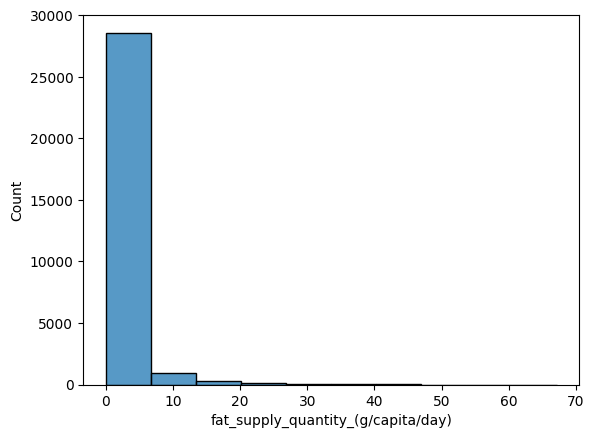

In [34]:
data = final_df["fat_supply_quantity_(g/capita/day)"]
sns.histplot(data, bins=10)
# sns.distplot(data)

C:\Users\socci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\socci\AppData\Local\Temp\ipykernel_3220\2882532566.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data, bins=10, palette="dark")


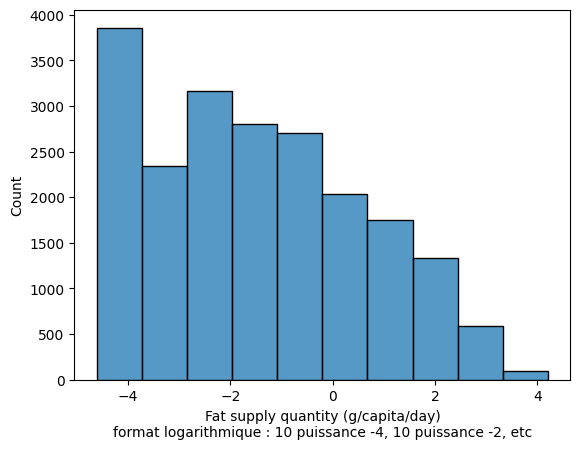

In [35]:
data = final_df["fat_supply_quantity_(g/capita/day)"]
data = np.log(data)
sns.histplot(data, bins=10, palette="dark")
sns.color_palette("dark")
# sns.barplot(x=np.arange(len(data)), y=data, palette="viridis")
plt.xlabel("Fat supply quantity (g/capita/day)\nformat logarithmique : 10 puissance -4, 10 puissance -2, etc")
# sns.distplot(data)
plt.show()
#les chiffres en X sont des 10 puissance chiffre (ex -4 = 10 puissance - 4)

In [36]:
filt = final_df['type'] == 'animal'
veg = final_df[filt] 

veg['item'].unique()


array(['Bovine Meat', 'Butter, Ghee', 'Cream', 'Demersal Fish', 'Eggs',
       'Fats, Animals, Raw', 'Freshwater Fish', 'Marine Fish, Other',
       'Meat, Other', 'Milk - Excluding Butter', 'Mutton & Goat Meat',
       'Offals, Edible', 'Pelagic Fish', 'Pigmeat', 'Poultry Meat',
       'Aquatic Animals, Others', 'Cephalopods', 'Crustaceans',
       'Molluscs, Other', 'Fish, Liver Oil', 'Meat, Aquatic Mammals',
       'Aquatic Plants', 'Fish, Body Oil'], dtype=object)

In [37]:
#19 Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)


filtre_ukraine = final_df['country'] == 'Ukraine'
final_df[filtre_ukraine]

filtre_year = final_df['year'] == 2018
final_df[filtre_year]

filtre_combiné = filtre_ukraine & filtre_year
final_df_filtré = final_df[filtre_combiné]
final_df_filtré


,continent,country_group,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),food_supply_quantity_(g/capita/day)
27884,Europe,Eastern Europe,804,Ukraine,2018,44446.95,animal,"Aquatic Animals, Others",0.00,0.01,0.01,0.00,0.027397
27885,Europe,Eastern Europe,804,Ukraine,2018,44446.95,animal,Bovine Meat,3.22,41.31,7.39,3.10,20.246575
27886,Europe,Eastern Europe,804,Ukraine,2018,44446.95,animal,"Butter, Ghee",2.53,22.92,1.13,0.02,3.095890
27887,Europe,Eastern Europe,804,Ukraine,2018,44446.95,animal,Cephalopods,0.00,0.13,0.06,0.03,0.164384
27888,Europe,Eastern Europe,804,Ukraine,2018,44446.95,animal,Cream,0.00,0.00,0.00,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27954,Europe,Eastern Europe,804,Ukraine,2018,44446.95,vegetal,Tea (including mate),0.00,0.14,0.36,0.01,0.986301
27955,Europe,Eastern Europe,804,Ukraine,2018,44446.95,vegetal,Tomatoes and products,0.27,28.33,50.84,1.21,139.287671
27956,Europe,Eastern Europe,804,Ukraine,2018,44446.95,vegetal,"Vegetables, other",0.58,72.91,99.46,4.11,272.493151
27957,Europe,Eastern Europe,804,Ukraine,2018,44446.95,vegetal,Wheat and products,4.21,808.26,109.41,25.33,299.753425


In [38]:
# assurez-vous que le DataFrame est trié correctement (par exemple, par année si vous voulez la valeur la plus récente)
final_df_sorted = final_df.sort_values(by=['year', 'country'], ascending=[False, True])

# supprimer les doublons, ne garder que la première occurrence de chaque pays
final_df_unique = final_df_sorted.drop_duplicates(subset='country')

# trier par population dans l'ordre décroissant
sorted_unique = final_df_unique.sort_values(by='pop_1000_hab', ascending=False)

# sélectionner les dix premiers pays
top_ten_countries = sorted_unique.head(10)

# Afficher les résultats
top_ten_countries[['country', 'pop_1000_hab']]



,country,pop_1000_hab
5508,"China, mainland",1421864.03
12092,India,1383112.05
28782,United States of America,334319.67
12264,Indonesia,269582.88
20716,Pakistan,223293.28
3024,Brazil,211782.88
20319,Nigeria,203304.49
1801,Bangladesh,165516.22
22621,Russian Federation,145742.29
13597,Japan,125791.68


In [105]:
#21 Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ? 
#Menez votre enquête et faites les corrections nécessaires en cas de problème. Contrôlez vos données grâce à ce site.

# assurez-vous que le DataFrame est trié correctement (par exemple, par année si vous voulez la valeur la plus récente)
filtre = final_df['year'] == 2019

df_sorted = final_df[filtre]
# assurez-vous que le DataFrame est trié correctement (par exemple, par année si vous voulez la valeur la plus récente)
final_df_sorted = df_sorted.sort_values(by=['year', 'country'], ascending=[False, True])

# supprimer les doublons, ne garder que la première occurrence de chaque pays
final_df_unique = final_df_sorted.drop_duplicates(subset='country')

# trier par population dans l'ordre décroissant
sorted_unique = final_df_unique.sort_values(by='pop_1000_hab', ascending=False)
sorted_unique
hab_2018 = sorted_unique['pop_1000_hab'].sum()
hab_2018


7716661.46

In [40]:
filtre = final_df['year'] == 2019
df_sorted = final_df[filtre]
# assurez-vous que le DataFrame est trié correctement (par exemple, par année si vous voulez la valeur la plus récente)
final_df_sorted = df_sorted.sort_values(by=['year', 'country'], ascending=[False, True])

# supprimer les doublons, ne garder que la première occurrence de chaque pays
final_df_unique = final_df_sorted.drop_duplicates(subset='country')

# trier par population dans l'ordre décroissant
sorted_unique = final_df_unique.sort_values(by='pop_1000_hab', ascending=False)
sorted_unique
hab_2019 = sorted_unique['pop_1000_hab'].sum()
hab_2019

7716661.46

In [41]:
#22 Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays. 



df_pivot = pd.pivot_table(final_df, index='country', values='pop_1000_hab',columns='year')

df_pivot = df_pivot.reset_index()
df_pivot['taux_croissance_pop_percent_18_19'] = (df_pivot[2019] - df_pivot[2018]) / df_pivot[2018] * 100


df_pivot



year,country,2018,2019,taux_croissance_pop_percent_18_19
0,Afghanistan,36686.78,37769.50,2.951254
1,Albania,2877.01,2873.88,-0.108794
2,Algeria,41927.01,42705.37,1.856464
3,Angola,31273.53,32353.59,3.453592
4,Antigua and Barbuda,91.63,92.12,0.534759
...,...,...,...,...
180,Venezuela (Bolivarian Republic of),29825.65,28971.68,-2.863207
181,Viet Nam,94914.33,95776.72,0.908598
182,Yemen,30790.51,31546.69,2.455887
183,Zambia,17835.89,18380.48,3.053338


In [42]:
#Affichez les 5 pays avec le taux de croissance démographique le plus élevé.

result = df_pivot.sort_values('taux_croissance_pop_percent_18_19', ascending=False)

result['country'].head(5)

162    Syrian Arab Republic
122                   Niger
3                    Angola
171                  Uganda
31                     Chad
Name: country, dtype: object

In [43]:
#23 Quel est le taux de croissance moyen en fonction de la zone géographique ?

df_pivot2 = pd.pivot_table(final_df, index=['country_group'], values='pop_1000_hab',columns='year')

df_pivot2 = df_pivot2.reset_index()
df_pivot2['taux_croissance_pop_percent_18_19'] = (df_pivot2[2019] - df_pivot2[2018]) / df_pivot2[2018] * 100


df_pivot2
df_pivot2.groupby('country_group')['taux_croissance_pop_percent_18_19'].mean()

country_group
Caribbean              1.022779
Central America        0.683017
Central Asia          -0.221574
Eastern Africa        -2.334388
Eastern Asia           0.882210
Eastern Europe         1.170497
Middle Africa          2.666163
Northern Africa        1.780982
Northern America       0.722410
Northern Europe        0.300372
Oceania              -13.209377
South America          0.788167
Southern Africa        1.764795
Southern Asia         -8.697706
Southern Europe        0.065108
Sub-Saharan Africa     2.260295
Western Asia          -9.539558
Western Europe        -0.706433
Name: taux_croissance_pop_percent_18_19, dtype: float64

In [44]:
#24 Calculez la disponibilité de nourriture totale par pays et par année, en kcal et kg de protéines. Attention aux unités de mesure !
result = final_df.groupby(['country','year'])[['protein_supply_quantity_(g/capita/day)','food_supply_(kcal/capita/day)']].sum()

result['protein_supply_quantity_(g/capita/day)'] = result['protein_supply_quantity_(g/capita/day)']*10**-3
result.rename(columns={'protein_supply_quantity_(g/capita/day)' : 'protein_supply_quantity_(kg/capita/day'})

result.head()


protein_supply_quantity_(g/capita/day)  \
country     year                                           
Afghanistan 2018                                 0.06292   
            2019                                 0.06096   
Albania     2018                                 0.11528   
            2019                                 0.11839   
Algeria     2018                                 0.09451   

                  food_supply_(kcal/capita/day)  
country     year                                 
Afghanistan 2018                        2265.23  
            2019                        2228.38  
Albania     2018                        3352.22  
            2019                        3374.75  
Algeria     2018                        3392.18

In [45]:
#25 En vous basant sur le résultat de la question précédente, calculez le ratio énergie/poids de chaque produit et pays. 
#Vous devriez vous apercevoir qu’étonnement, ces informations varient en fonction du pays. Pour pallier ce problème, 
#calculez la moyenne de ce ratio pour chaque aliment.  Attention à bien gérer les valeurs égales à 0. 
#Vérifiez la cohérence de votre calcul en comparant le résultat avec l’apport calorique d’un œuf.

final_df.groupby(['country'])


In [46]:
final_df.head(50)

,continent,country_group,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),food_supply_quantity_(g/capita/day)
0,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12,7.315068
1,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02,3.123288
2,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00,0.109589
3,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03,0.410959
4,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49,4.301370
5,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,"Fats, Animals, Raw",0.68,6.35,0.35,0.05,0.958904
6,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Freshwater Fish,0.03,0.58,0.27,0.08,0.739726
7,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,"Marine Fish, Other",0.00,0.00,0.00,0.00,0.000000
8,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,"Meat, Other",0.06,1.20,0.32,0.16,0.876712
9,Asia,Southern Asia,4,Afghanistan,2018,36686.78,animal,Milk - Excluding Butter,4.36,97.20,47.88,5.98,131.178082


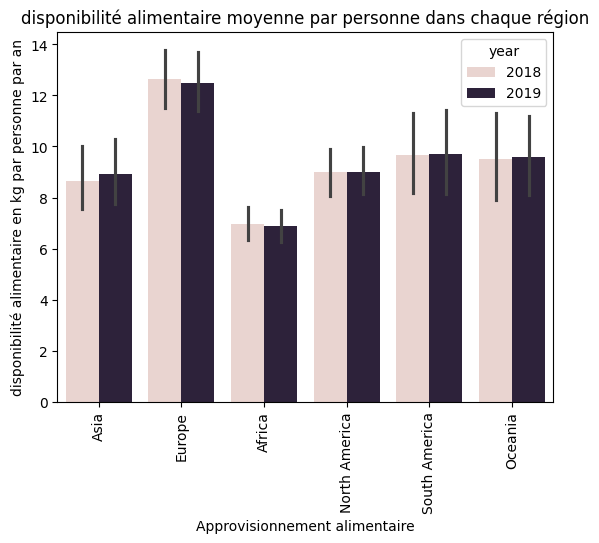

In [47]:
# result = final_df.groupby(['continent','year'])[['food_supply_quantity_(kg/capita/yr)']].sum()
# result

sns.barplot(x = 'continent', y ='food_supply_quantity_(kg/capita/yr)', data=final_df, hue='year')
plt.title('disponibilité alimentaire moyenne par personne dans chaque région')
plt.xlabel('Approvisionnement alimentaire')
plt.ylabel('disponibilité alimentaire en kg par personne par an')
plt.xticks(rotation=90)
plt.show()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Albania'),
  Text(1, 0, 'Austria'),
  Text(2, 0, 'Belgium'),
  Text(3, 0, 'Bosnia and Herzegovina'),
  Text(4, 0, 'Bulgaria'),
  Text(5, 0, 'Belarus'),
  Text(6, 0, 'Croatia'),
  Text(7, 0, 'Cyprus'),
  Text(8, 0, 'Czechia'),
  Text(9, 0, 'Denmark'),
  Text(10, 0, 'Estonia'),
  Text(11, 0, 'Finland'),
  Text(12, 0, 'France'),
  Text(13, 0, 'Germany'),
  Text(14, 0, 'Greece'),
  Text(15, 0, 'Hungary'),
  Text(16, 0, 'Iceland'),
  Text(17, 0, 'Ireland'),
  Text(18, 0, 'Italy'),
  Text(19, 0, 'Latvia'),
  Text(20, 0, 'Lithuania'),
  Text(21, 0, 'Luxembourg'),
  Text(22, 0, 'Malta'),
  Text(23, 0, 'Montenegro'),
  Text(24, 0, 'Norway'),
  Text(25, 0, 'Poland'),
  Text(26, 0, 'Portugal'),
  Text(27, 0, 'Romania'),
  Text(28, 0, 'Serbia'),
  Text(29, 0, 'Slovakia'),
  Text(3

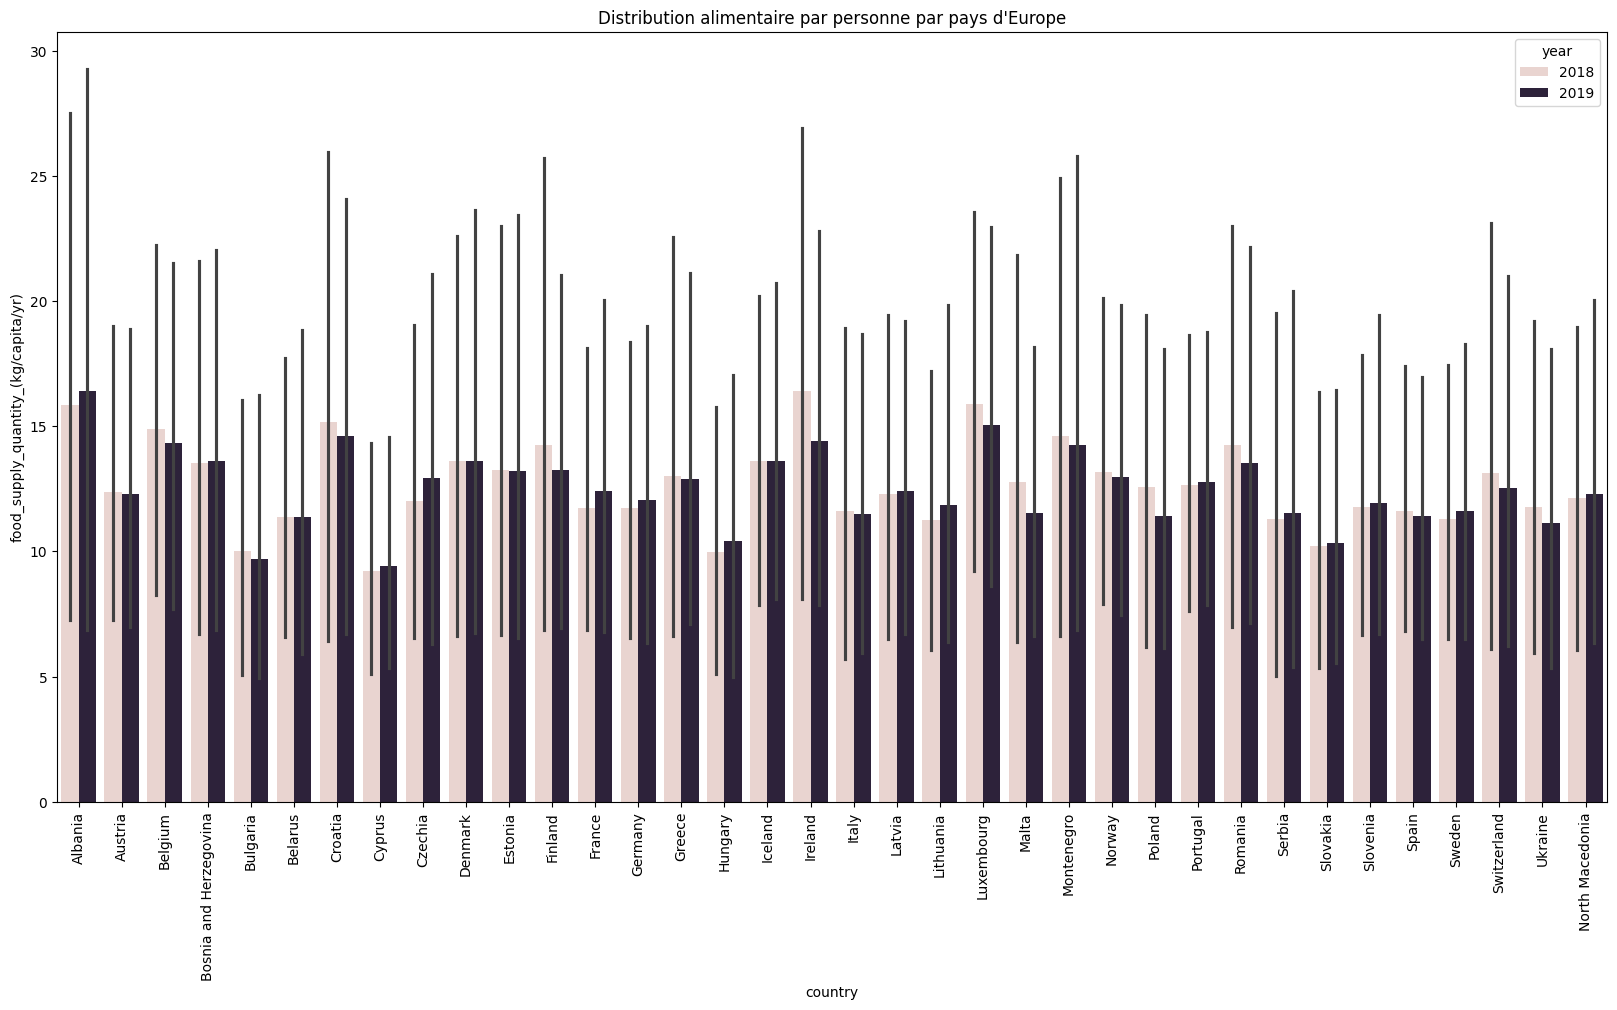

In [48]:
filtre_continent = final_df['continent'] == 'Europe'
europe = final_df[filtre_continent]
plt.figure(figsize=(20,10))
plt.title("Distribution alimentaire par personne par pays d'Europe")
sns.barplot(x = 'country', y ='food_supply_quantity_(kg/capita/yr)', data=europe, hue='year')
plt.xticks(rotation=90)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Southern Europe'),
  Text(1, 0, 'Western Europe'),
  Text(2, 0, 'Eastern Europe'),
  Text(3, 0, 'Western Asia'),
  Text(4, 0, 'Northern Europe')])

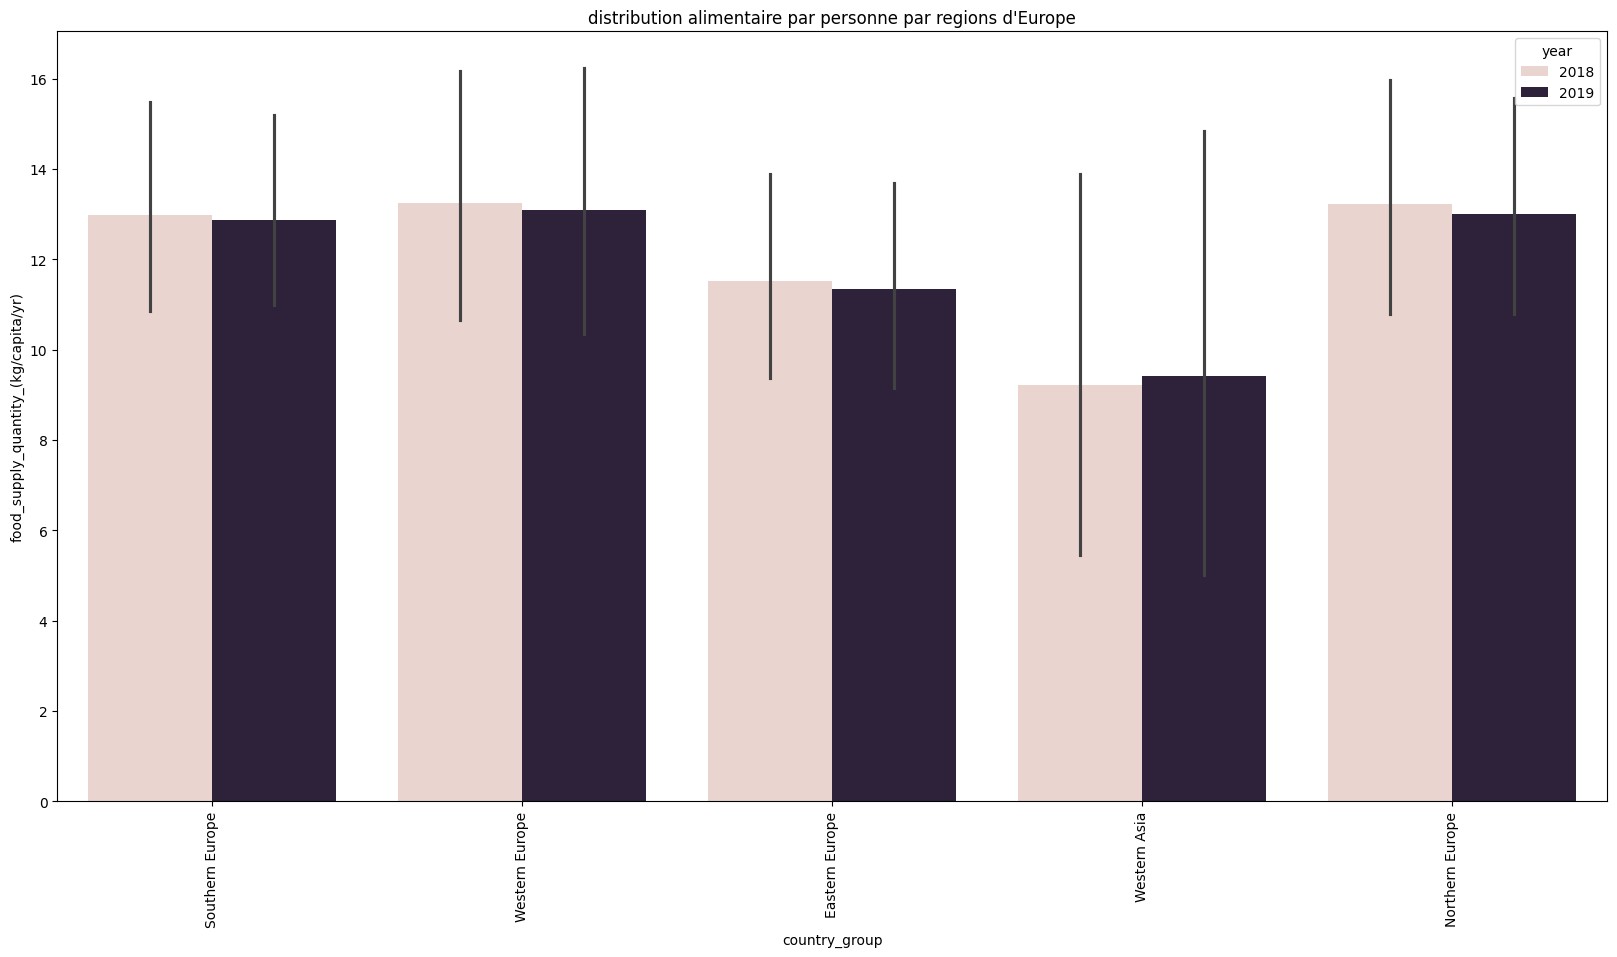

In [49]:
filtre_continent = final_df['continent'] == 'Europe'
europe = final_df[filtre_continent]
plt.figure(figsize=(20,10))
plt.title("distribution alimentaire par personne par regions d'Europe")
sns.barplot(x = 'country_group', y ='food_supply_quantity_(kg/capita/yr)', data=europe, hue='year')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Angola'),
  Text(2, 0, 'Botswana'),
  Text(3, 0, 'Burundi'),
  Text(4, 0, 'Cameroon'),
  Text(5, 0, 'Central African Republic'),
  Text(6, 0, 'Chad'),
  Text(7, 0, 'Comoros'),
  Text(8, 0, 'Congo'),
  Text(9, 0, 'Benin'),
  Text(10, 0, 'Ethiopia'),
  Text(11, 0, 'Djibouti'),
  Text(12, 0, 'Gabon'),
  Text(13, 0, 'Gambia'),
  Text(14, 0, 'Ghana'),
  Text(15, 0, 'Guinea'),
  Text(16, 0, 'Kenya'),
  Text(17, 0, 'Lesotho'),
  Text(18, 0, 'Liberia'),
  Text(19, 0, 'Libya'),
  Text(20, 0, 'Madagascar'),
  Text(21, 0, 'Malawi'),
  Text(22, 0, 'Mali'),
  Text(23, 0, 'Mauritania'),
  Text(24, 0, 'Mauritius'),
  Text(25, 0, 'Morocco'),
  Text(26, 0, 'Mozambique'),
  Text(27, 0, 'Namibia'),

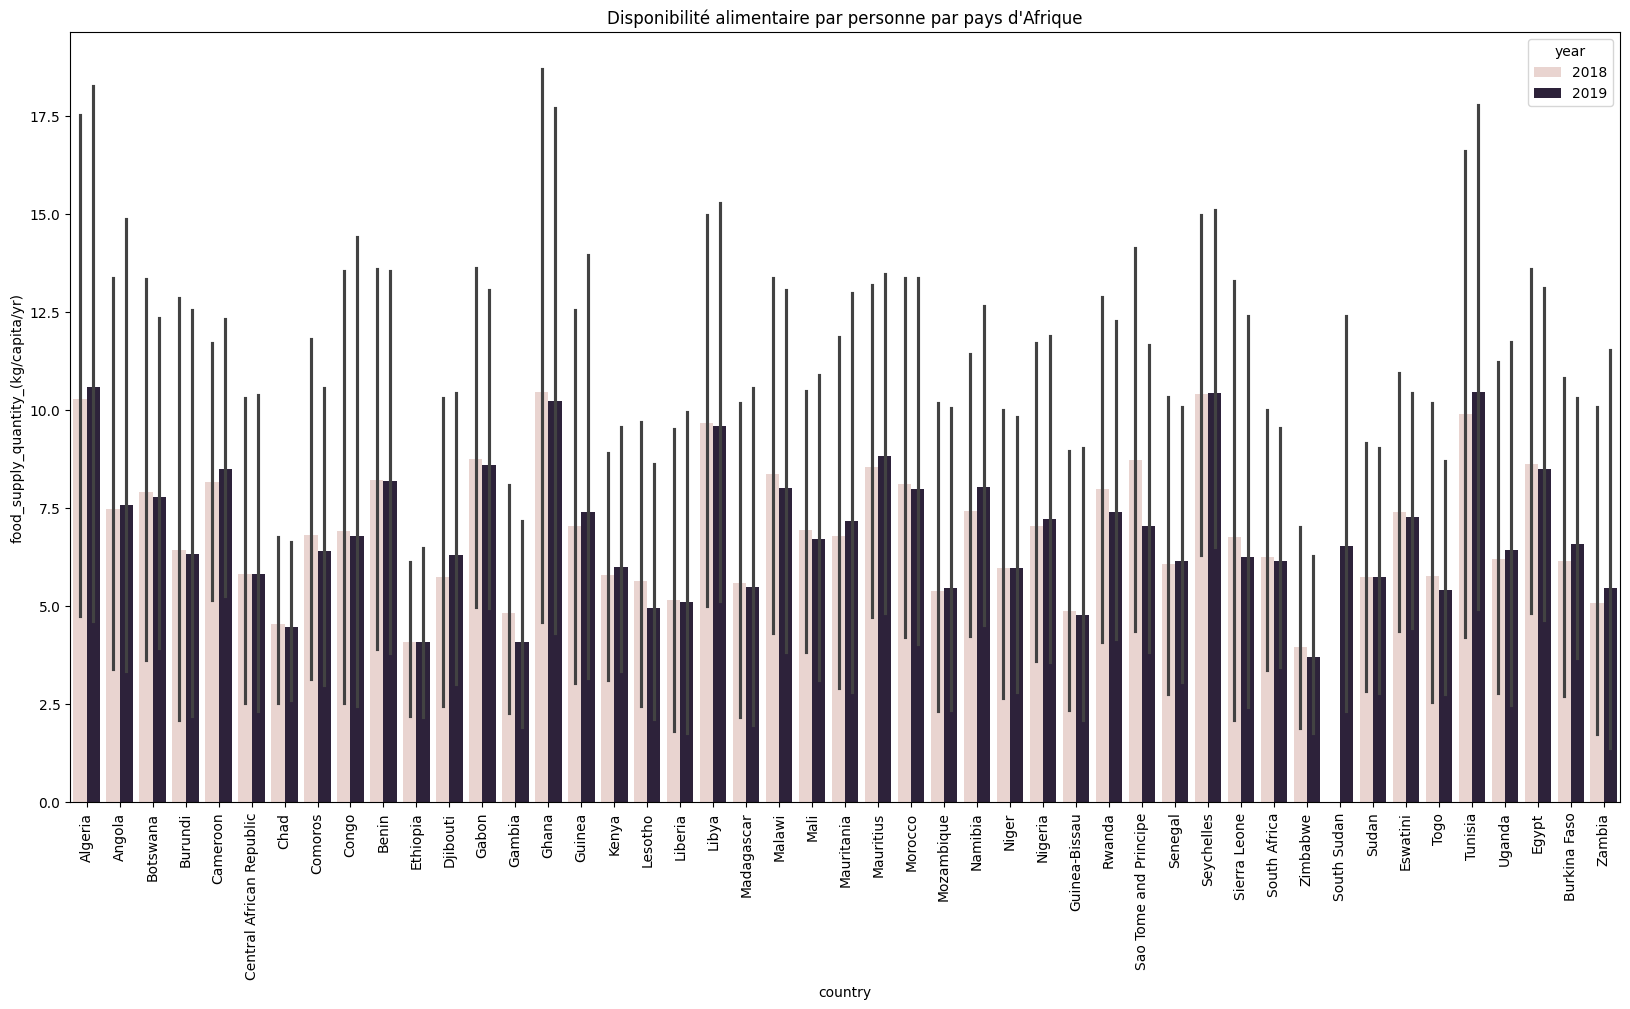

In [50]:
filtre_continent = final_df['continent'] == 'Africa'
africa = final_df[filtre_continent]
plt.figure(figsize=(20,10))
plt.title("Disponibilité alimentaire par personne par pays d'Afrique")
sns.barplot(x = 'country', y ='food_supply_quantity_(kg/capita/yr)', data=africa, hue='year')
plt.xticks(rotation=90)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Northern Africa'),
  Text(1, 0, 'Middle Africa'),
  Text(2, 0, 'Southern Africa'),
  Text(3, 0, 'Eastern Africa'),
  Text(4, 0, 'Sub-Saharan Africa')])

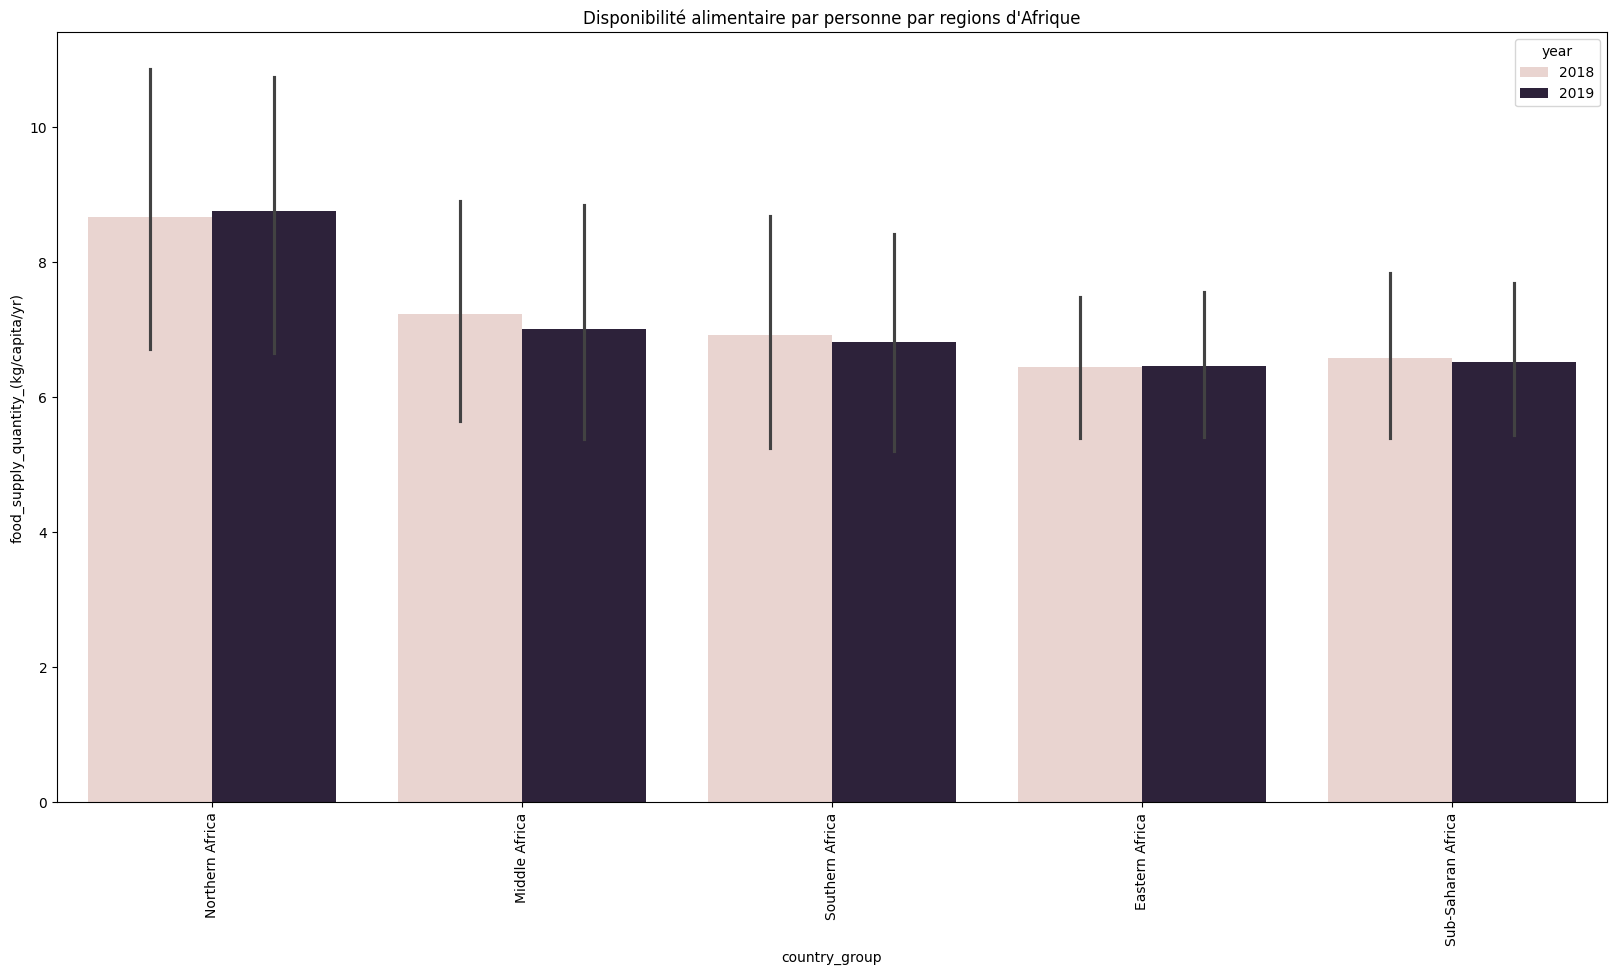

In [51]:
filtre_continent = final_df['continent'] == 'Africa'
africa = final_df[filtre_continent]
plt.figure(figsize=(20,10))
plt.title("Disponibilité alimentaire par personne par regions d'Afrique")
sns.barplot(x = 'country_group', y ='food_supply_quantity_(kg/capita/yr)', data=africa, hue='year')
plt.xticks(rotation=90)

<Axes: xlabel='year'>

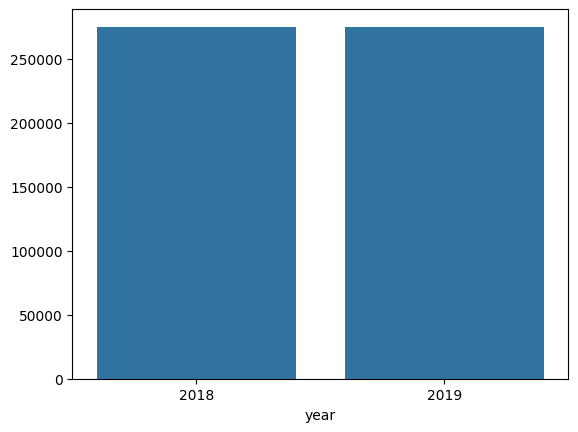

In [52]:
total = final_df['food_supply_quantity_(kg/capita/yr)'].sum()

sns.barplot(x = 'year', y = total, data=final_df)


In [53]:
#pour visualiser la somme des food supply par continent
result = final_df.groupby(['continent','year','type'])[['food_supply_quantity_(kg/capita/yr)']].sum()

result.head(50)


food_supply_quantity_(kg/capita/yr)
continent     year type                                        
Africa        2018 animal                               3945.93
                   vegetal                             22863.23
              2019 animal                               4132.60
                   vegetal                             23192.30
Asia          2018 animal                               7022.94
                   vegetal                             15820.70
              2019 animal                               7750.93
                   vegetal                             18159.01
Europe        2018 animal                              11897.57
                   vegetal                             24034.93
              2019 animal                              12027.52
                   vegetal                             23759.21
North America 2018 animal                               4371.04
                   vegetal                             11961.86
              2019 animal                               4466.46
                   vegetal                             12014.95
Oceania       2018 animal                               1910.99
                   vegetal                              5845.27
              2019 animal                               2217.12
                   vegetal                              6347.66
South America 2018 animal                               2146.80
                   vegetal                              5723.70
              2019 animal                               2240.11
                   vegetal                              5706.07

<Axes: title={'center': 'Disponibilité alimentaire animal et vegetal en Europe en 2018'}, ylabel='food_supply_quantity_(kg/capita/yr)'>

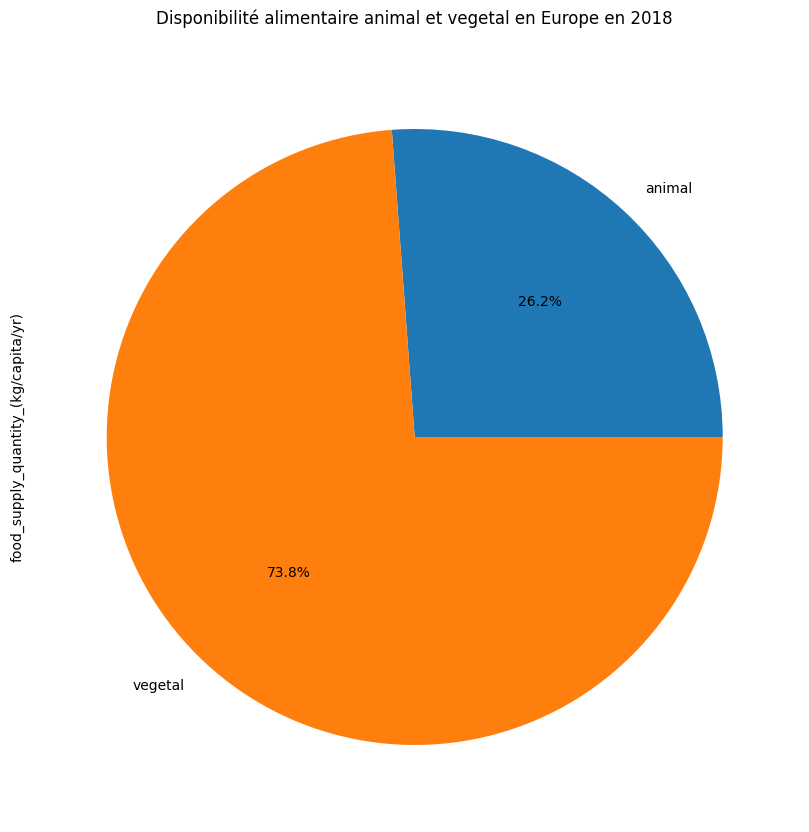

In [54]:
filt_18 = final_df['year'] == 2018
r = final_df[filt_18]
r = r.groupby('type')['food_supply_quantity_(kg/capita/yr)'].sum()
r
b = r.plot.pie(y = r, figsize = (10,10), autopct = lambda x: str(round(x, 1)) + "%")
plt.title('Disponibilité alimentaire animal et vegetal en Europe en 2018', loc='center', pad=20)
b




<Axes: title={'center': 'Disponibilité alimentaire animal et vegetal en Europe en 2018'}, ylabel='food_supply_quantity_(kg/capita/yr)'>

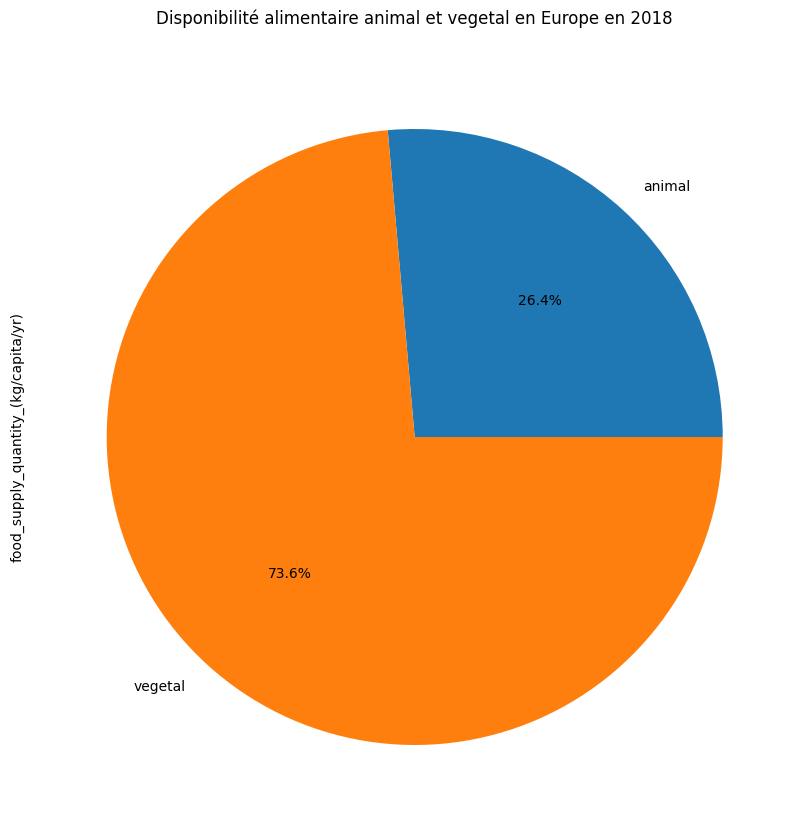

In [55]:
filt_19 = final_df['year'] == 2019
r = final_df[filt_19]
r = r.groupby('type')['food_supply_quantity_(kg/capita/yr)'].sum()
r
b = r.plot.pie(y = r, figsize = (10,10), autopct = lambda x: str(round(x, 1)) + "%")
plt.title('Disponibilité alimentaire animal et vegetal en Europe en 2018', loc='center', pad=20)
b

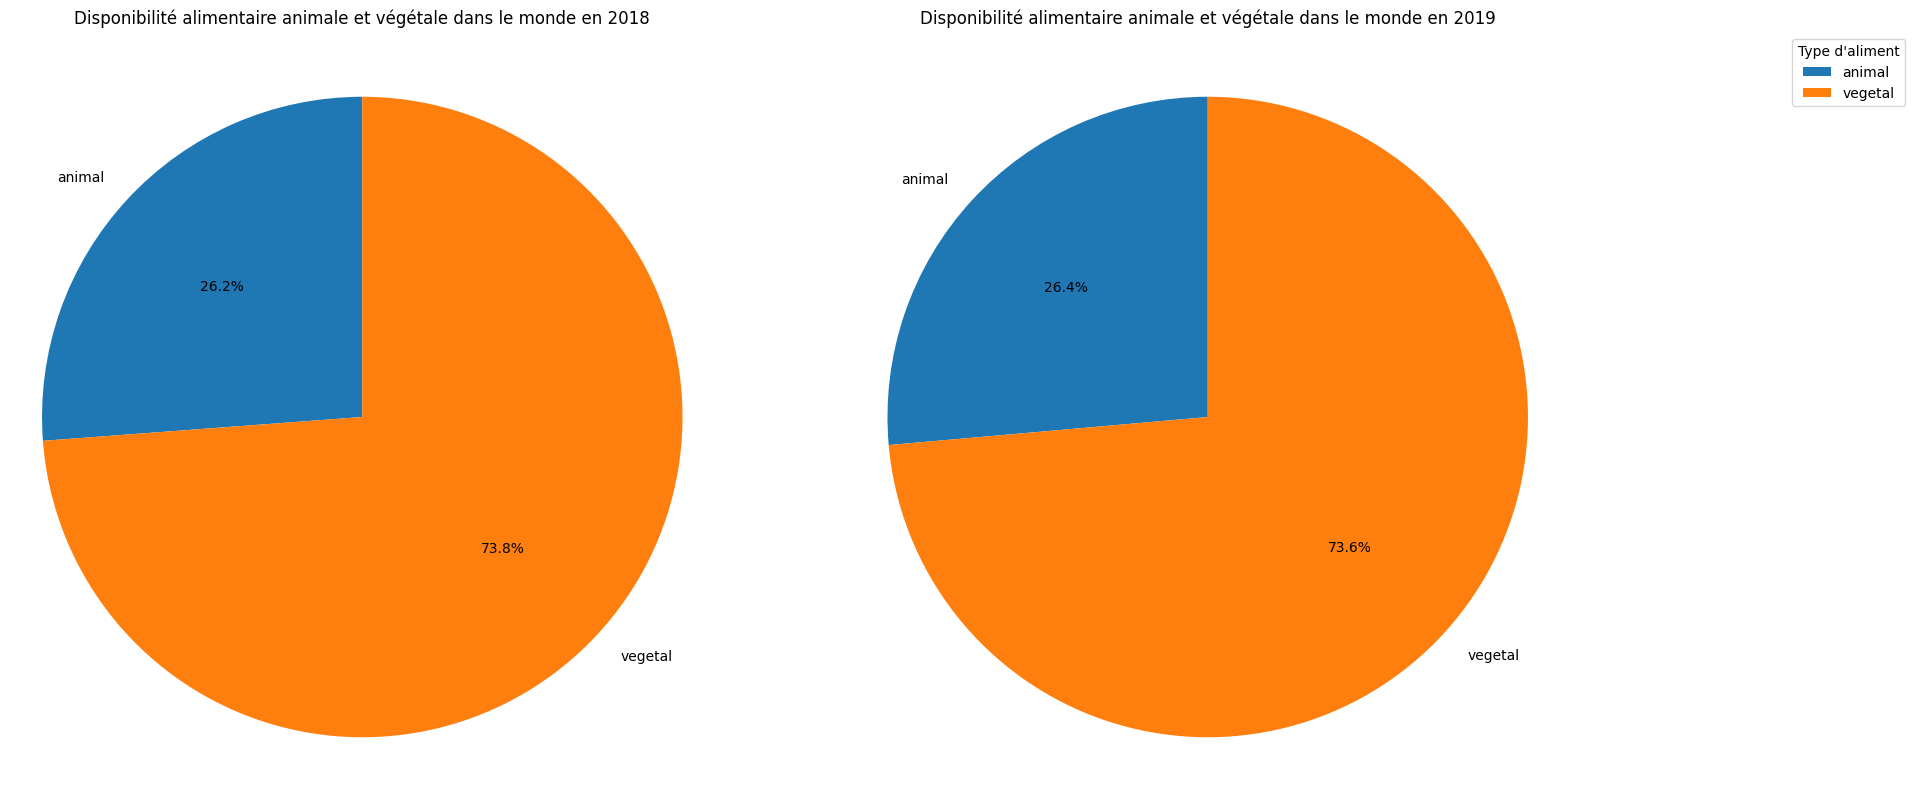

In [56]:
# Filtre pour 2018
filt_18 = final_df['year'] == 2018
data_2018 = final_df[filt_18].groupby('type')['food_supply_quantity_(kg/capita/yr)'].sum()

# Filtre pour 2019
filt_19 = final_df['year'] == 2019
data_2019 = final_df[filt_19].groupby('type')['food_supply_quantity_(kg/capita/yr)'].sum()

# Création du graphique
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # 1 ligne, 2 colonnes

# Graphique pour 2018
ax[0].pie(data_2018, labels=data_2018.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Disponibilité alimentaire animale et végétale dans le monde en 2018')
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Graphique pour 2019
ax[1].pie(data_2019, labels=data_2019.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Disponibilité alimentaire animale et végétale dans le monde en 2019')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Ajout d'une légende
plt.legend(title="Type d'aliment", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

# Afficher le graphique
plt.show()

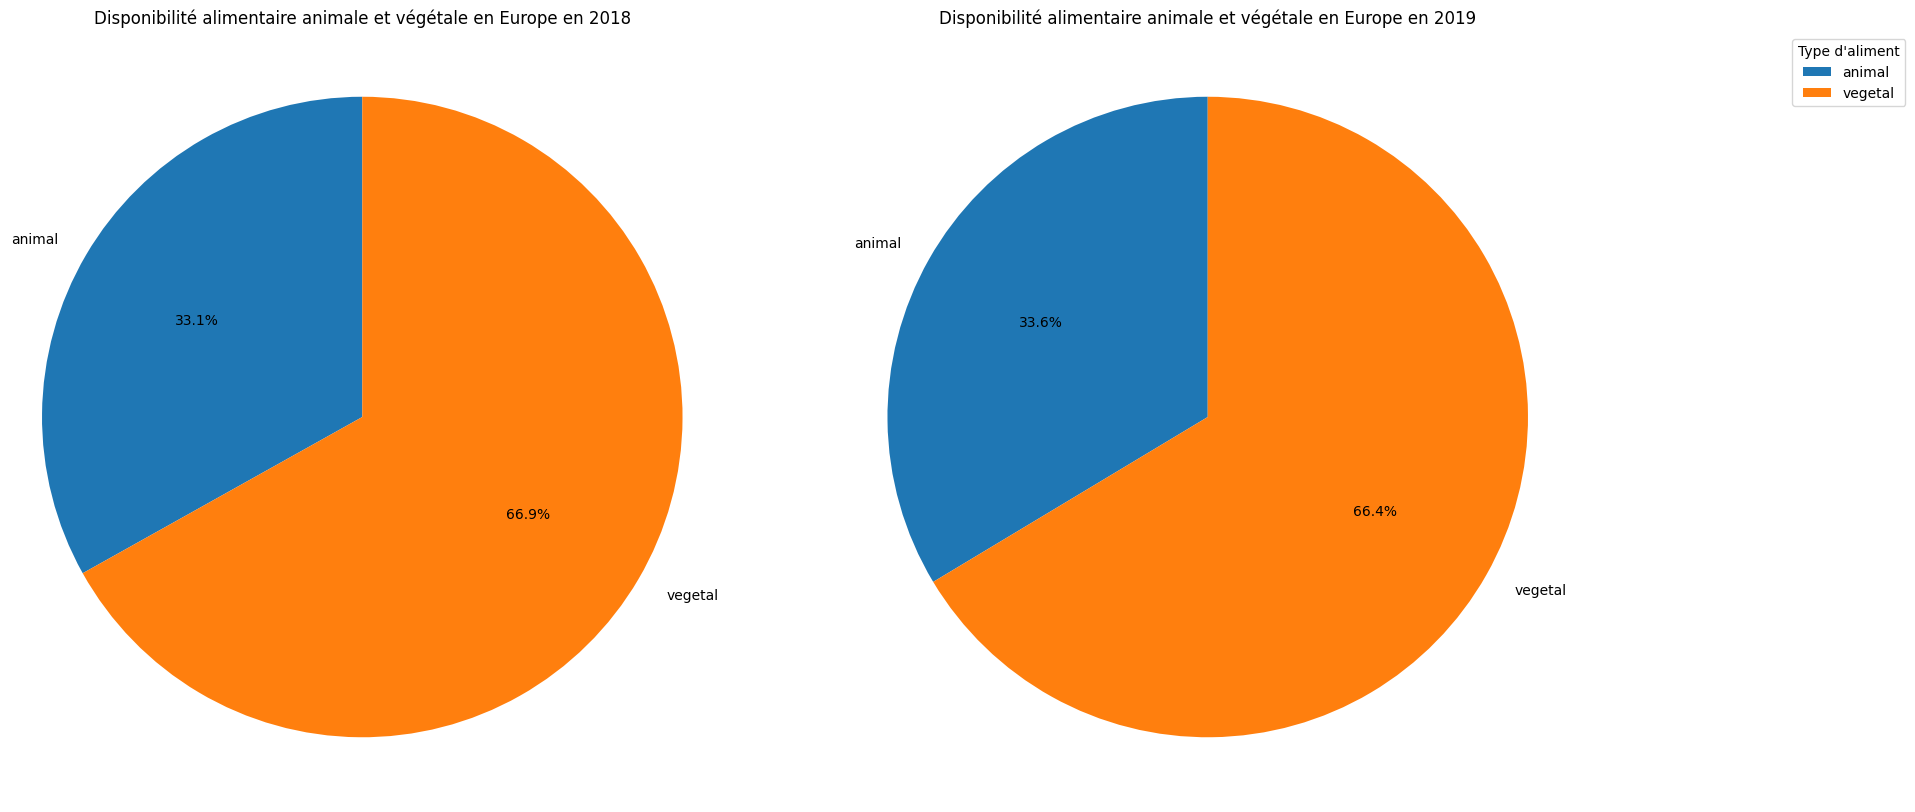

In [57]:
# Filtre pour 2018
filt_18 = final_df['year'] == 2018
filt_continent = final_df['continent'] == 'Europe'
data_2018 = final_df[filt_18 & filt_continent].groupby('type')['food_supply_quantity_(kg/capita/yr)'].sum()

# Filtre pour 2019
filt_19 = final_df['year'] == 2019
filt_continent = final_df['continent'] == 'Europe'
data_2019 = final_df[filt_19 & filt_continent].groupby('type')['food_supply_quantity_(kg/capita/yr)'].sum()

# Création du graphique
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # 1 ligne, 2 colonnes

# Graphique pour 2018
ax[0].pie(data_2018, labels=data_2018.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Disponibilité alimentaire animale et végétale en Europe en 2018')
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Graphique pour 2019
ax[1].pie(data_2019, labels=data_2019.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Disponibilité alimentaire animale et végétale en Europe en 2019')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Ajout d'une légende
plt.legend(title="Type d'aliment", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

# Afficher le graphique
plt.show()

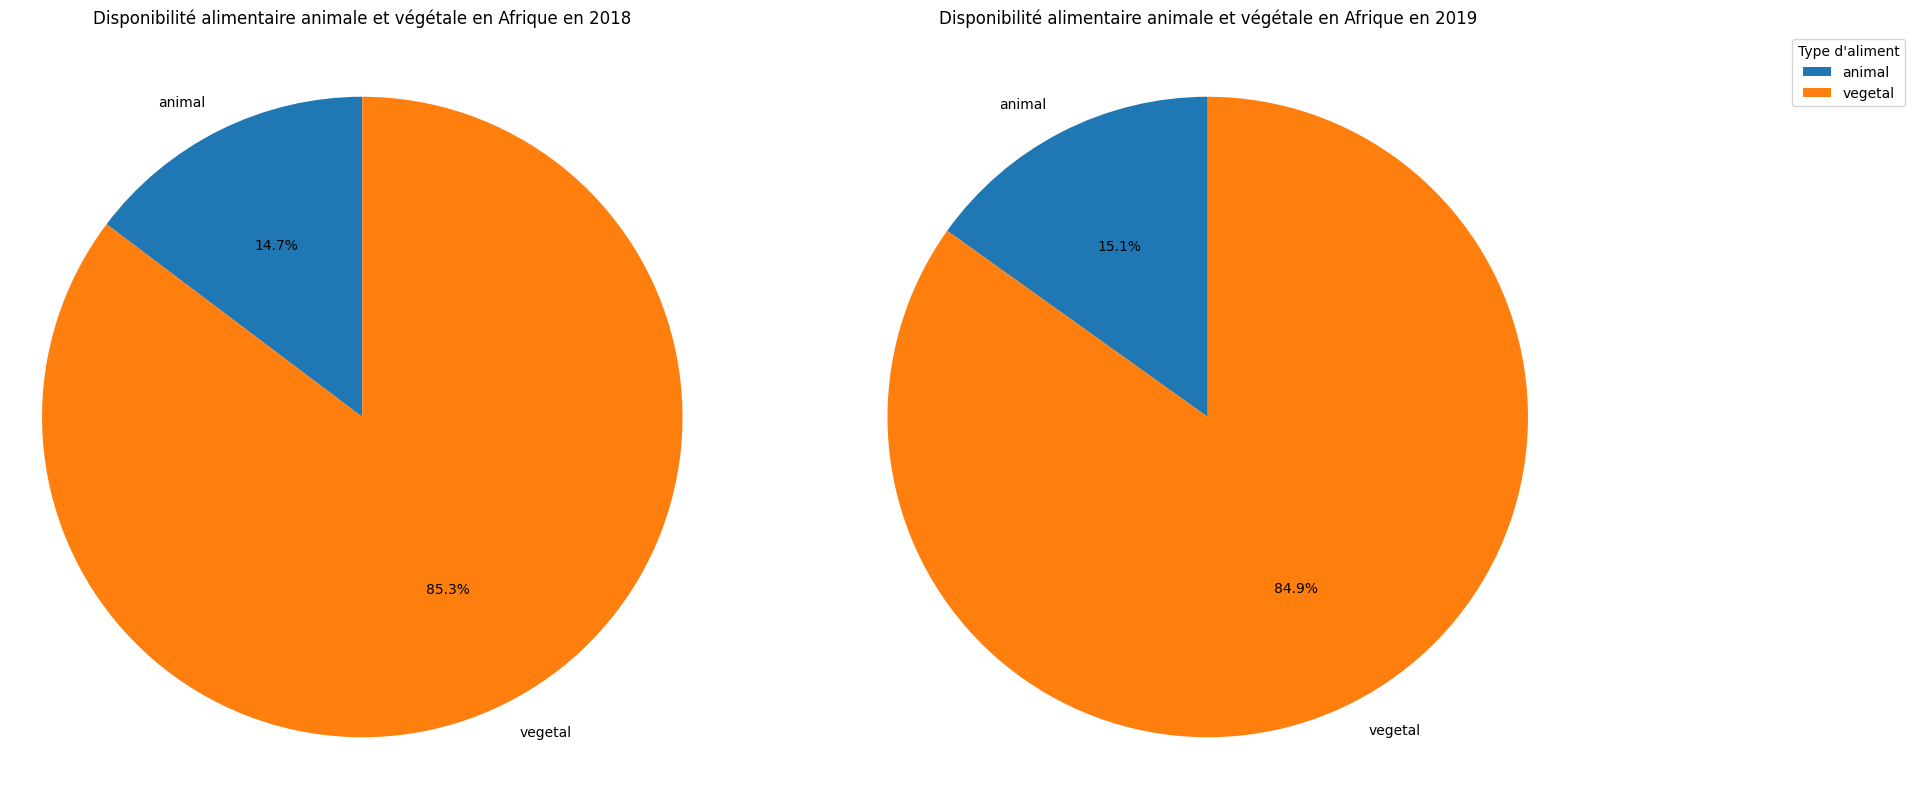

In [58]:
# Filtre pour 2018
filt_18 = final_df['year'] == 2018
filt_continent = final_df['continent'] == 'Africa'
data_2018 = final_df[filt_18 & filt_continent].groupby('type')['food_supply_quantity_(kg/capita/yr)'].sum()

# Filtre pour 2019
filt_19 = final_df['year'] == 2019
filt_continent = final_df['continent'] == 'Africa'
data_2019 = final_df[filt_19 & filt_continent].groupby('type')['food_supply_quantity_(kg/capita/yr)'].sum()

# Création du graphique
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # 1 ligne, 2 colonnes

# Graphique pour 2018
ax[0].pie(data_2018, labels=data_2018.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Disponibilité alimentaire animale et végétale en Afrique en 2018')
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Graphique pour 2019
ax[1].pie(data_2019, labels=data_2019.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Disponibilité alimentaire animale et végétale en Afrique en 2019')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Ajout d'une légende
plt.legend(title="Type d'aliment", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

# Afficher le graphique
plt.show()

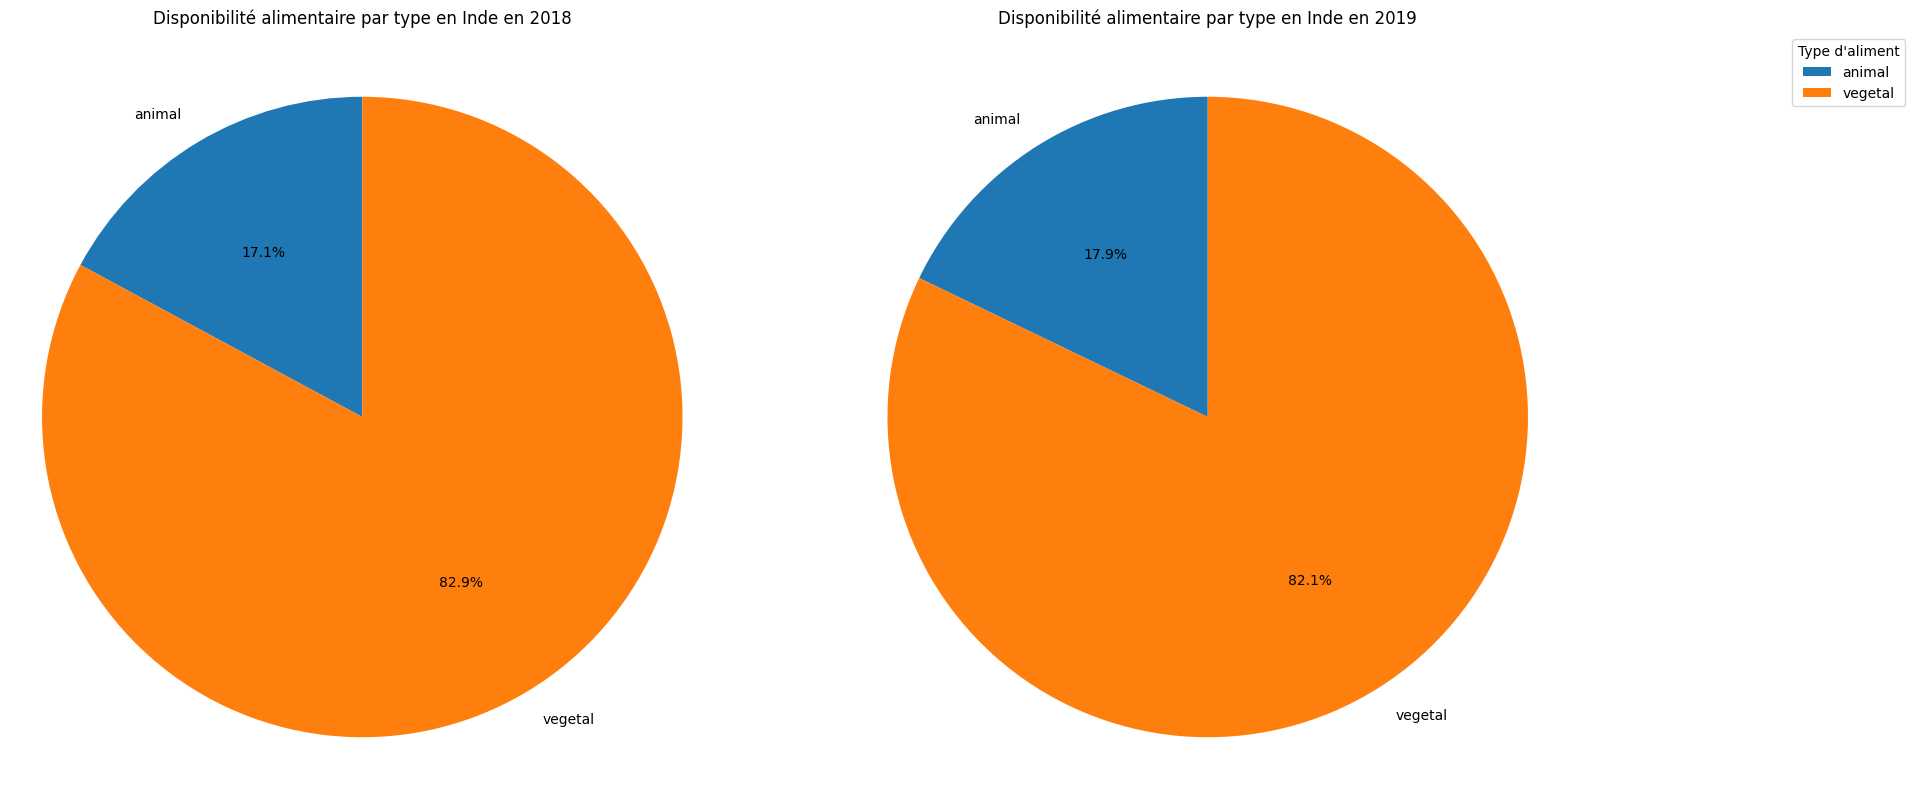

In [144]:

filt_inde = final_df['country'] == 'India'
filt_18 = final_df['year'] == 2018
data_2018 = final_df[filt_18 & filt_inde].groupby('type')['food_supply_quantity_(kg/capita/yr)'].sum()

# Filtre pour 2019
filt_19 = final_df['year'] == 2019

data_2019 = final_df[filt_19 & filt_inde].groupby('type')['food_supply_quantity_(kg/capita/yr)'].sum()

# Création du graphique
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # 1 ligne, 2 colonnes
plt.rcParams['font.size'] = 25  # Augmente la taille de la police générale
plt.rcParams['legend.fontsize'] = 20
# Graphique pour 2018
ax[0].pie(data_2018, labels=data_2018.index, autopct='%1.1f%%', startangle=90)
#ax[0].set_title('Disponibilité alimentaire par type en Inde en 2018')
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Graphique pour 2019
ax[1].pie(data_2019, labels=data_2019.index, autopct='%1.1f%%', startangle=90)
#ax[1].set_title('Disponibilité alimentaire par type en Inde en 2019')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.suptitle('Répartition par type de la disponibilité alimentaire en Inde en 2018 et 2019', fontsize=30, ha='center')
# Ajout d'une légende
plt.legend(title="Type d'aliment", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

# Afficher le graphique
plt.show()

In [148]:
filt_inde = final_df['country'] == 'India'
f = final_df[filt_inde]
r = f.groupby(['type','item'])['food_supply_quantity_(kg/capita/yr)'].sum()
r.head(50)

type     item                           
animal   Aquatic Animals, Others              0.00
         Bovine Meat                          2.09
         Butter, Ghee                         6.82
         Cephalopods                          0.00
         Crustaceans                          0.80
         Demersal Fish                        1.17
         Eggs                                 7.19
         Fats, Animals, Raw                   0.07
         Freshwater Fish                     12.10
         Marine Fish, Other                   0.28
         Meat, Other                          0.00
         Milk - Excluding Butter            144.87
         Molluscs, Other                      0.19
         Mutton & Goat Meat                   1.16
         Offals, Edible                       0.46
         Pelagic Fish                         1.33
         Pigmeat                              0.53
         Poultry Meat                         6.16
vegetal  Apples and products             

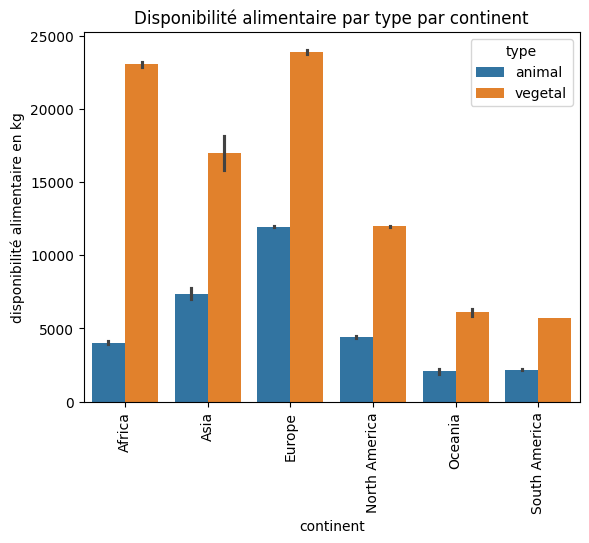

In [59]:
# new_df_18 = final_df["year"] == 2019
# result = final_df[new_df_18]
# r2 = result.groupby(['continent','year','type'])['food_supply_quantity_(kg/capita/yr)'].sum()

# r2_reset = r2.reset_index()

# # Créer le graphique
# sns.barplot(x='continent', y='food_supply_quantity_(kg/capita/yr)', hue='type', data=r2_reset)

# # Ajouter des titres et des légendes si nécessaire
# plt.title('Disponibilité alimentaire par continent et type pour 2019')
# plt.xlabel('Continent')
# plt.ylabel('Disponibilité alimentaire (kg/capita/yr)')
# plt.legend(title='Type')

# # Afficher le graphique
# plt.show()
# r2

sns.barplot(x = 'continent', y ='food_supply_quantity_(kg/capita/yr)', data=result, hue='type')
plt.title('Disponibilité alimentaire par type par continent')
plt.ylabel('disponibilité alimentaire en kg')
plt.xticks(rotation=90)
plt.show()

#rappel : result et pas final_df ici, result fais la somme des 
# foodsupply par groupby, ça reflète la quantité totale de nourriture mesurée en kilogrammes disponibles pour la consommation pour l'ensemble de la population


<Axes: title={'center': 'Disponibilité alimentaire animal et vegetal en Europe en 2018 et 2019'}, ylabel='Disponibilité alimentaire'>

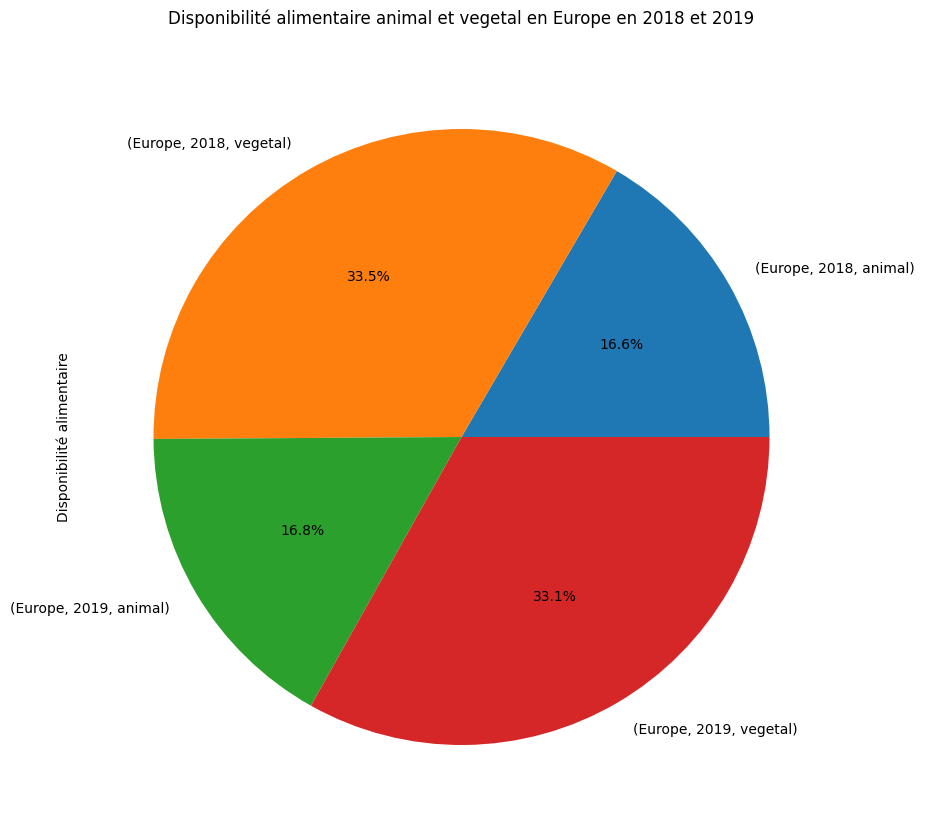

In [60]:
filt_europe = final_df['continent'] == 'Europe'

europe = final_df[filt_europe]
europe = europe.groupby(['continent','year','type'])['food_supply_quantity_(kg/capita/yr)'].sum()
europe
b = europe.plot.pie(y = final_df, ylabel='Disponibilité alimentaire', figsize = (10,10), autopct = lambda x: str(round(x, 1)) + "%")
plt.title('Disponibilité alimentaire animal et vegetal en Europe en 2018 et 2019', loc='center', pad=20)
b

<Axes: title={'center': 'Disponibilité alimentaire animal et vegetal en Afrique en 2018 et 2019'}, ylabel='food_supply_quantity_(kg/capita/yr)'>

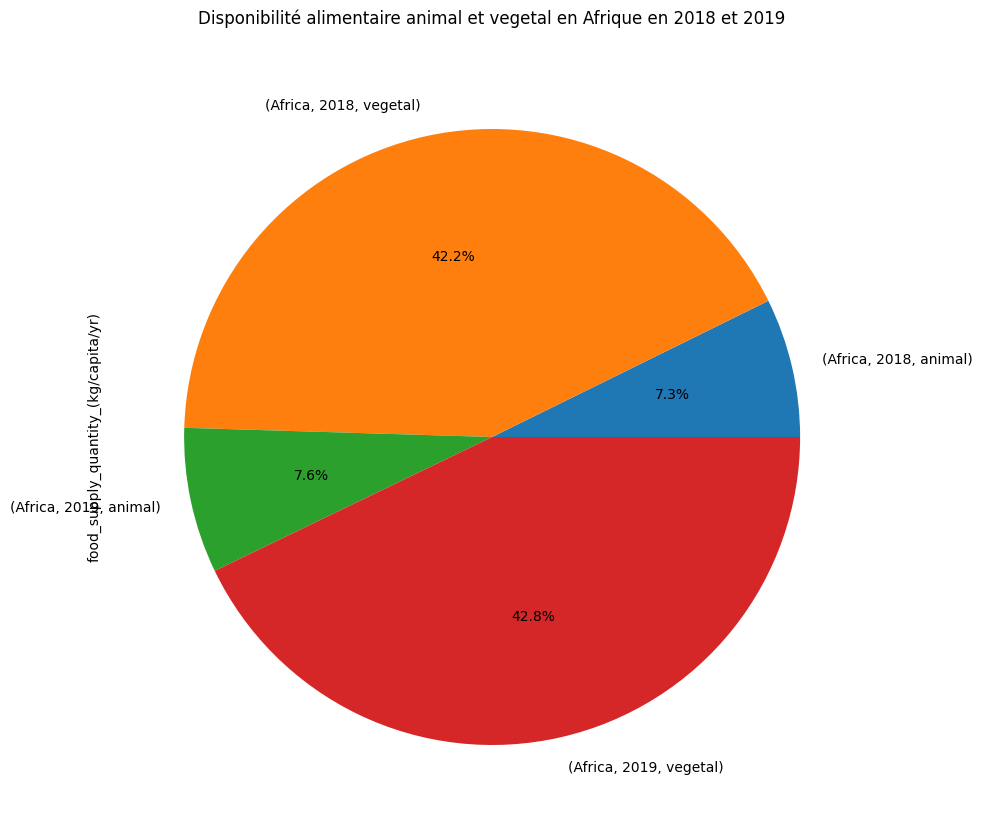

In [61]:
filt_africa = final_df['continent'] == 'Africa'

africa = final_df[filt_africa]
africa = africa.groupby(['continent','year','type'])['food_supply_quantity_(kg/capita/yr)'].sum()
africa
b = africa.plot.pie(y = final_df, figsize = (10,10), autopct = lambda x: str(round(x, 1)) + "%")
plt.title('Disponibilité alimentaire animal et vegetal en Afrique en 2018 et 2019', loc='center', pad=20)
b

In [62]:
filt_europe = final_df['continent'] == 'Europe'

europe = final_df[filt_europe]
europe = europe.groupby(['country_group'])['food_supply_quantity_(kg/capita/yr)'].sum()
europe

country_group
Eastern Europe     14243.01
Northern Europe    18658.84
Southern Europe    24731.53
Western Asia        1584.48
Western Europe     12501.37
Name: food_supply_quantity_(kg/capita/yr), dtype: float64

<Axes: ylabel='Disponibilité alimentaire en Europe'>

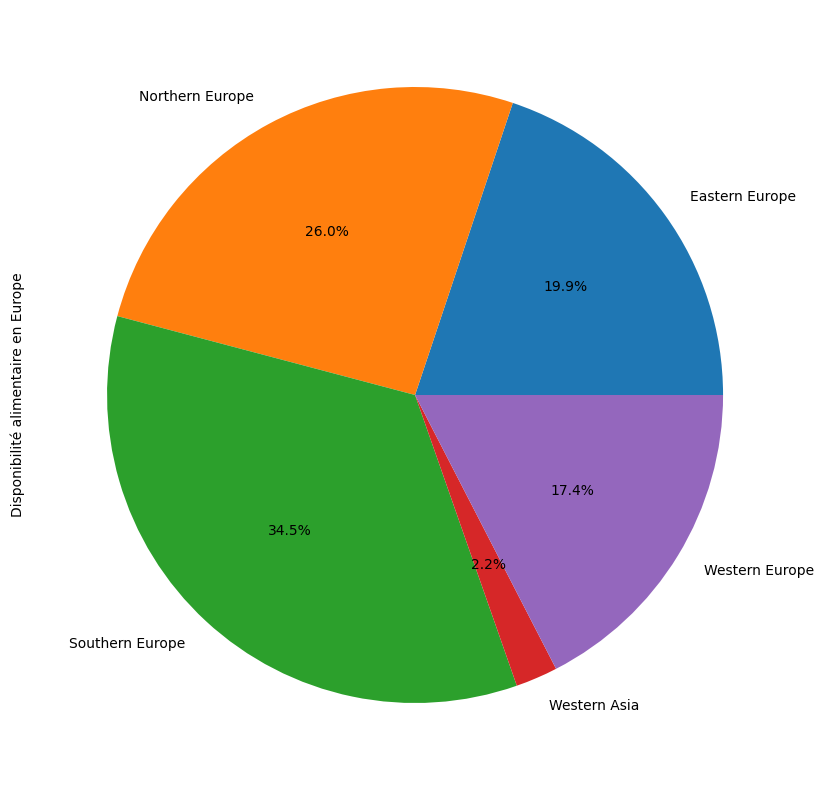

In [63]:
europe.plot.pie(y = europe, ylabel='Disponibilité alimentaire en Europe', figsize = (10,10), autopct = lambda x: str(round(x, 1)) + "%")

<Axes: ylabel='Disponibilité alimentaire en Afrique'>

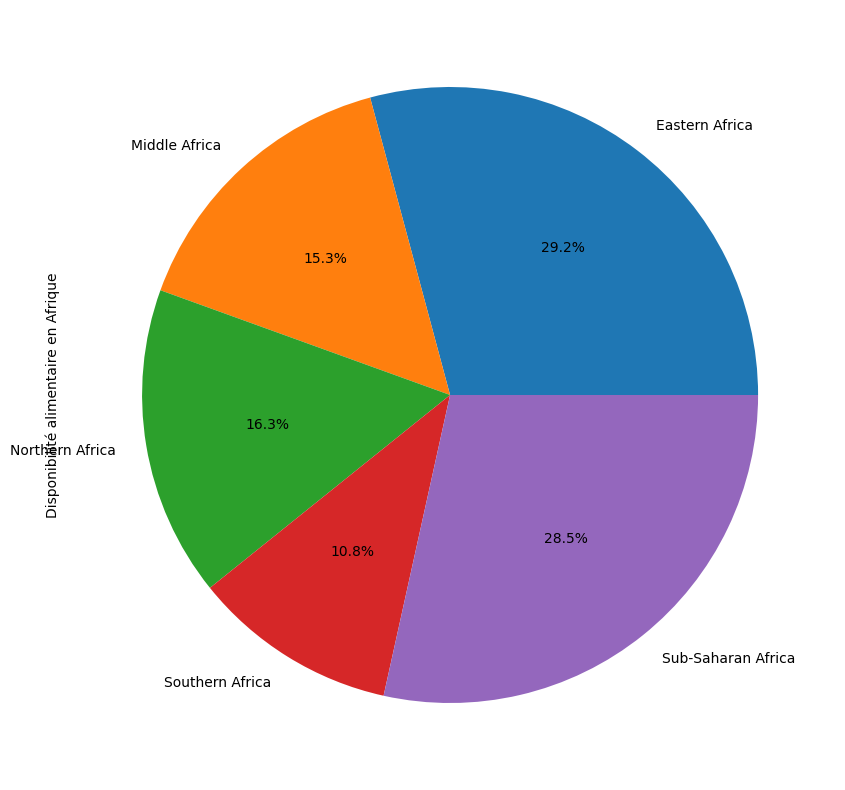

In [64]:
#a voir si c'est intéressant, somme des dispo alimentaire par country group d'afrique 
filt_africa = final_df['continent'] == 'Africa'

africa = final_df[filt_africa]
africa = africa.groupby(['country_group'])['food_supply_quantity_(kg/capita/yr)'].sum()
africa

africa.plot.pie(y = africa, ylabel='Disponibilité alimentaire en Afrique', figsize = (10,10), autopct = lambda x: str(round(x, 1)) + "%")

In [65]:
## creation d'un nouveau dataset sur la food supply en kg vege/anim focalisé sur les pays d'afrique pris sur fao
#deux fichier csv sont pris séparément et sont merge ensuite pour créé le complet

df_vege_var = pd.read_csv('vege_supply_africa.csv')
df_vege_var.columns = df_vege_var.columns.str.replace(' ', '_').str.lower()
df_vege_var["type"] = "vegetal"
df_vege_var.head(10)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2010,2010,kg,182.29,E,Estimated value,vegetal
1,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2013,2013,kg,176.41,E,Estimated value,vegetal
2,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2017,2017,kg,173.12,E,Estimated value,vegetal
3,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2021,2021,kg,191.97,E,Estimated value,vegetal
4,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2807,Rice and products,2010,2010,kg,3.99,E,Estimated value,vegetal
5,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2807,Rice and products,2013,2013,kg,3.77,E,Estimated value,vegetal
6,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2807,Rice and products,2017,2017,kg,3.94,E,Estimated value,vegetal
7,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2807,Rice and products,2021,2021,kg,3.93,E,Estimated value,vegetal
8,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2513,Barley and products,2010,2010,kg,13.51,E,Estimated value,vegetal
9,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2513,Barley and products,2013,2013,kg,15.59,E,Estimated value,vegetal


In [66]:
df_animal_var = pd.read_csv('anim_supply_africa.csv')
df_animal_var.columns = df_animal_var.columns.str.replace(' ', '_').str.lower()
df_animal_var["type"] = "animal"
df_animal_var.head(10)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2010,2010,kg,4.92,E,Estimated value,animal
1,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2013,2013,kg,5.94,E,Estimated value,animal
2,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2017,2017,kg,5.07,E,Estimated value,animal
3,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2021,2021,kg,3.53,E,Estimated value,animal
4,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2732,Mutton & Goat Meat,2010,2010,kg,7.44,E,Estimated value,animal
5,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2732,Mutton & Goat Meat,2013,2013,kg,7.66,E,Estimated value,animal
6,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2732,Mutton & Goat Meat,2017,2017,kg,7.96,E,Estimated value,animal
7,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2732,Mutton & Goat Meat,2021,2021,kg,8.18,E,Estimated value,animal
8,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2733,Pigmeat,2010,2010,kg,0.00,E,Estimated value,animal
9,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2733,Pigmeat,2013,2013,kg,0.00,E,Estimated value,animal


In [67]:
df_new_products = pd.merge(df_vege_var, df_animal_var, how = "outer")
df_new_products.head(3)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2010,2010,kg,182.29,E,Estimated value,vegetal
1,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2013,2013,kg,176.41,E,Estimated value,vegetal
2,FBS,Food Balances (2010-),12,Algeria,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2017,2017,kg,173.12,E,Estimated value,vegetal


In [68]:
df_new_products = df_new_products[["area_code_(m49)", "area", "element", "item", "year", "type", "unit", "value"]]
df_new_products


df = df_new_products.pivot_table(index=["area", "year", "type", "item"], columns="element", values="value")
df.head(20)


element                                       Food supply quantity (kg/capita/yr)
area    year type    item                                                        
Algeria 2010 animal  Bovine Meat                                             4.92
                     Butter, Ghee                                            0.57
                     Cephalopods                                             0.03
                     Crustaceans                                             0.08
                     Demersal Fish                                           0.38
                     Eggs                                                    6.57
                     Fats, Animals, Raw                                      0.30
                     Freshwater Fish                                         0.05
                     Marine Fish, Other                                      0.39
                     Meat, Other                                             0.36
                     Milk - Excluding Butter                               146.53
                     Molluscs, Other                                         0.01
                     Mutton & Goat Meat                                      7.44
                     Offals, Edible                                          1.27
                     Pelagic Fish                                            3.00
                     Pigmeat                                                 0.00
                     Poultry Meat                                            7.31
             vegetal Apples and products                                    13.58
                     Bananas                                                 1.46
                     Barley and products                                    13.51

In [69]:
result = df.groupby(['area','year','type'])[['Food supply quantity (kg/capita/yr)']].sum().reset_index()

result.head(30)




element,area,year,type,Food supply quantity (kg/capita/yr)
0,Algeria,2010,animal,179.21
1,Algeria,2010,vegetal,588.43
2,Algeria,2013,animal,199.01
3,Algeria,2013,vegetal,643.49
4,Algeria,2017,animal,193.43
5,Algeria,2017,vegetal,642.06
6,Algeria,2021,animal,179.16
7,Algeria,2021,vegetal,672.86
8,Angola,2010,animal,51.12
9,Angola,2010,vegetal,595.07


In [70]:
#dans toute l'afrique
new = result.groupby(['year','type'])['Food supply quantity (kg/capita/yr)'].sum()
new = new.reset_index()
new

,year,type,Food supply quantity (kg/capita/yr)
0,2010,animal,4004.25
1,2010,vegetal,23956.31
2,2013,animal,4260.96
3,2013,vegetal,24640.30
4,2017,animal,4232.16
5,2017,vegetal,24811.10
6,2021,animal,4708.79
7,2021,vegetal,26677.61


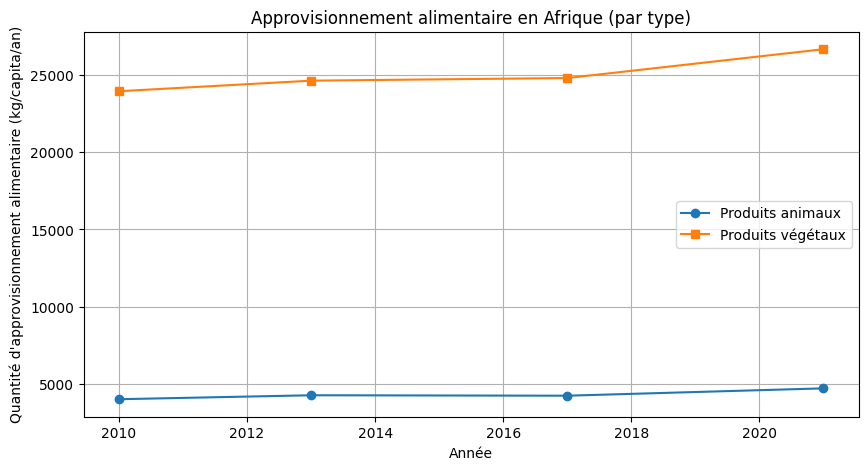

In [71]:
#graphique representatif

# Séparation des données pour les produits animaux et végétaux
df_animal = new[new['type'] == 'animal']
df_vegetal = new[new['type'] == 'vegetal']

# Tracé des courbes
plt.figure(figsize=(10, 5))
plt.plot(df_animal['year'], df_animal['Food supply quantity (kg/capita/yr)'], marker='o', label='Produits animaux')
plt.plot(df_vegetal['year'], df_vegetal['Food supply quantity (kg/capita/yr)'], marker='s', label='Produits végétaux')

# Ajout des titres et des étiquettes
plt.title('Approvisionnement alimentaire en Afrique (par type)')
plt.xlabel('Année')
plt.ylabel('Quantité d\'approvisionnement alimentaire (kg/capita/an)')
plt.legend()
plt.grid(True)
plt.show()

In [78]:

result['area'].unique()
filt = final_df['country_group'] == 'Northern Africa'
f = final_df[filt]
f['country'].unique()

array(['Algeria', 'Libya', 'Morocco', 'Sudan', 'Tunisia', 'Egypt'],
      dtype=object)

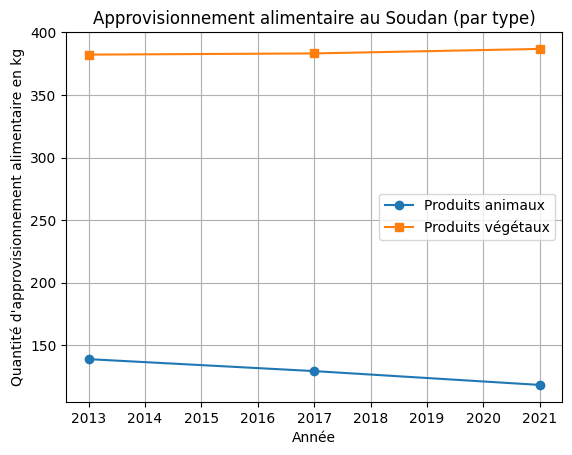

In [87]:
# pays en guerre et voir ce qu'il en est pour faire une relation avec la population en baisse 
filt_pays = result['area'] == 'Sudan'
pays_guerre = result[filt_pays].reset_index()
pays_guerre
pays_guerre_a = pays_guerre[pays_guerre['type'] == 'animal']
pays_guerre_v = pays_guerre[pays_guerre['type'] == 'vegetal']

plt.plot(pays_guerre_a['year'], pays_guerre_a['Food supply quantity (kg/capita/yr)'], marker='o', label='Produits animaux')
plt.plot(pays_guerre_v['year'], pays_guerre_v['Food supply quantity (kg/capita/yr)'], marker='s', label='Produits végétaux')

plt.title('Approvisionnement alimentaire au Soudan (par type)')
plt.xlabel('Année')
plt.ylabel('Quantité d\'approvisionnement alimentaire en kg')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
filt_pays = final_df['continent'] == 'Africa'
croissance_africa = final_df[filt_pays]
croissance_africa = pd.pivot_table(croissance_africa, index=['country_group'], values='pop_1000_hab',columns='year')

croissance_africa = croissance_africa.reset_index()
croissance_africa['taux_croissance_pop_percent_18_19'] = (croissance_africa[2019] - croissance_africa[2018]) / croissance_africa[2018] * 100
croissance_africa['difference'] = (croissance_africa[2019] - croissance_africa[2018]) 
croissance_africa



year,country_group,2018,2019,taux_croissance_pop_percent_18_19,difference
0,Eastern Africa,24668.393384,24060.145942,-2.465695,-608.247442
1,Middle Africa,12288.993038,12427.800324,1.129525,138.807287
2,Northern Africa,40353.804508,41072.498493,1.780982,718.693985
3,Southern Africa,13302.912459,13537.681620,1.764795,234.769161
4,Sub-Saharan Africa,26285.435194,26877.191904,2.251272,591.756709


In [75]:
filt_pays = final_df['continent'] == 'Europe'
croissance_europe = final_df[filt_pays]
croissance_europe = pd.pivot_table(croissance_europe, index=['country_group'], values='pop_1000_hab',columns='year')

croissance_europe = croissance_europe.reset_index()
croissance_europe['taux_croissance_pop_percent_18_19'] = (croissance_europe[2019] - croissance_europe[2018]) / croissance_europe[2018] * 100
croissance_europe['difference'] = (croissance_europe[2019] - croissance_europe[2018]) 
croissance_europe

year,country_group,2018,2019,taux_croissance_pop_percent_18_19,difference
0,Eastern Europe,17943.678101,18265.915667,1.795828,322.237566
1,Northern Europe,4254.509030,4286.607678,0.754462,32.098649
2,Southern Europe,12746.385517,12754.684447,0.065108,8.298930
3,Western Asia,1218.830000,1228.840000,0.821279,10.010000
4,Western Europe,29928.524979,29685.051109,-0.813518,-243.473870


In [76]:
filt = final_df['year'] == 2018
final = final_df[filt]
final = final.groupby('year')['food_supply_quantity_(kg/capita/yr)'].sum()
final

year
2018    135066.4
Name: food_supply_quantity_(kg/capita/yr), dtype: float64

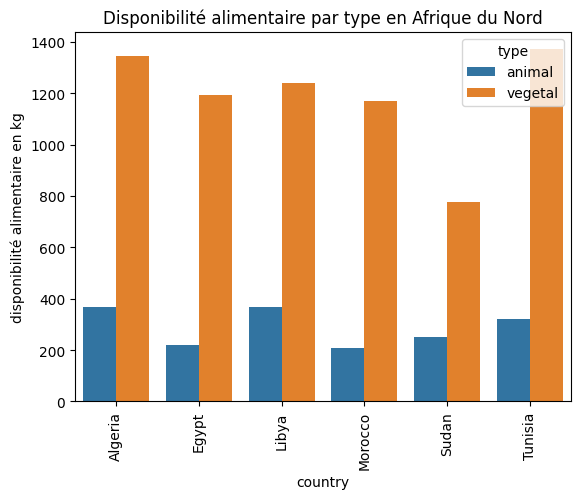

food_supply_quantity_(kg/capita/yr)
country type                                        
Algeria animal                                367.60
        vegetal                              1342.74
Egypt   animal                                220.49
        vegetal                              1192.02
Libya   animal                                366.09
        vegetal                              1239.83
Morocco animal                                206.58
        vegetal                              1168.01
Sudan   animal                                251.00
        vegetal                               776.43
Tunisia animal                                319.35
        vegetal                              1369.95

In [94]:
fil_grp = final_df['country_group'] == 'Northern Africa'
fil_grp = final_df[fil_grp]
result = fil_grp.groupby(['country','type'])[['food_supply_quantity_(kg/capita/yr)']].sum()
plt.rcParams['font.size'] = 10  # Augmente la taille de la police générale
plt.rcParams['legend.fontsize'] = 10
sns.barplot(x = 'country', y ='food_supply_quantity_(kg/capita/yr)', data=result, hue='type')
plt.title("Disponibilité alimentaire par type en Afrique du Nord")
plt.ylabel('disponibilité alimentaire en kg')
plt.xticks(rotation=90)
plt.show()

result.head(50)

In [98]:
filt_pays = final_df['continent'] == 'Asia'
croissance_europe = final_df[filt_pays]
croissance_europe = pd.pivot_table(croissance_europe, index=['country_group'], values='pop_1000_hab',columns='year')

croissance_europe = croissance_europe.reset_index()
croissance_europe['taux_croissance_pop_percent_18_19'] = (croissance_europe[2019] - croissance_europe[2018]) / croissance_europe[2018] * 100
croissance_europe['difference'] = (croissance_europe[2019] - croissance_europe[2018]) 


In [95]:
final_df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', nan], dtype=object)

In [102]:
filt_pays = final_df['continent'] == 'Asia'
f = final_df[filt_pays]
f.groupby(['year','country_group'])['pop_1000_hab'].sum()

year  country_group
2018  Central Asia     5.665142e+06
      Eastern Asia     1.112378e+07
      Southern Asia    1.554661e+08
      Western Asia     1.324552e+07
2019  Central Asia     5.623527e+06
      Eastern Asia     1.108638e+07
      Southern Asia    1.567917e+08
      Western Asia     1.401307e+07
Name: pop_1000_hab, dtype: float64

In [132]:
filtre = final_df['year'] == 2019
filtre2 = final_df['continent'] == 'Asia'
df_sorted = final_df[filtre & filtre2]
# assurez-vous que le DataFrame est trié correctement (par exemple, par année si vous voulez la valeur la plus récente)
# final_df_sorted = df_sorted.sort_values(by=['year', 'country'], ascending=[False, True])

# supprimer les doublons, ne garder que la première occurrence de chaque pays
final_df_unique = df_sorted.drop_duplicates(subset='country')

# trier par population dans l'ordre décroissant
sorted_unique = final_df_unique.sort_values(by='pop_1000_hab', ascending=False)
sorted_unique
hab_2018 = sorted_unique['pop_1000_hab'].sum()
hab_2018

2784836.4999999995

In [130]:
filtre = final_df['year'] == 2019
df_sorted = final_df[filtre]
# assurez-vous que le DataFrame est trié correctement (par exemple, par année si vous voulez la valeur la plus récente)
# final_df_sorted = df_sorted.sort_values(by=['year', 'country'], ascending=[False, True])

# supprimer les doublons, ne garder que la première occurrence de chaque pays
#final_df_unique = df_sorted.drop_duplicates(subset='country')

# trier par population dans l'ordre décroissant
sorted_unique = final_df_unique.sort_values(by='food_supply_quantity_(kg/capita/yr)', ascending=False)
sorted_unique
hab_2018 = df_sorted['food_supply_quantity_(kg/capita/yr)'].sum()
hab_2018

140205.06